In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn import mixture
from sklearn.cluster import DBSCAN
from sklearn import metrics

In [3]:
# 경고문 무시
import warnings
warnings.filterwarnings(action='ignore')

# plt 한국어 폰트 적용
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname='C:/Windows/Fonts/malgun.ttf').get_name()
rc('font', family= font_name)

# 30개까지 데이터프레임 확인가능
pd.set_option('display.max_columns', 30)

# <br><br> 메인 데이터 수집

- 데이터 수집 : https://www.data.go.kr/data/15003493/fileData.do

- 참고 : https://medium.com/@sunwoopark/samsung-data-challenge-2018-eda%EB%A5%BC-%EC%A4%91%EC%8B%AC%EC%9C%BC%EB%A1%9C-62ae7f38d188

### <br>데이터 불러오기 및 확인

In [3]:
# 2012~2019년 교통사고 사망정보 데이터 불러오기
accident2012_2014 = pd.read_csv('./data/2012_2019_교통사망사고정보/2012_2014_교통사망사고정보.csv', encoding='euc-kr')
accident2015 = pd.read_csv('./data/2012_2019_교통사망사고정보/2015_교통사망사고정보.csv', encoding='euc-kr')
accident2016 = pd.read_csv('./data/2012_2019_교통사망사고정보/2016_교통사망사고정보.csv', encoding='euc-kr')
accident2017 = pd.read_csv('./data/2012_2019_교통사망사고정보/2017_교통사망사고정보.csv', encoding='euc-kr')
accident2018 = pd.read_csv('./data/2012_2019_교통사망사고정보/2018_교통사망사고정보.csv', encoding='euc-kr')
accident2019 = pd.read_csv('./data/2012_2019_교통사망사고정보/2019_교통사망사고정보.csv', encoding='euc-kr')

In [4]:
# 크기 확인
accident2019.shape, accident2018.shape, accident2017.shape, accident2016.shape, accident2015.shape, accident2012_2014.shape 

((3233, 23), (3657, 26), (4065, 27), (4119, 27), (4447, 26), (14624, 27))

In [5]:
# 2019년 데이터 컬럼 확인
accident2019.columns

Index(['발생년', '발생년월일시', '주야', '요일', '사망자수', '부상자수', '중상자수', '경상자수', '부상신고자수',
       '발생지시도', '발생지시군구', '사고유형_대분류', '사고유형_중분류', '사고유형', '가해자법규위반',
       '도로형태_대분류', '도로형태', '가해자_당사자종별', '피해자_당사자종별', '발생위치X_UTMK',
       '발생위치Y_UTMK', '경도', '위도'],
      dtype='object')

In [6]:
# 2018년 데이터 컬럼 확인
accident2018.columns

Index(['발생년', '발생년월일시분', '주야', '요일', '사망자수', '사상자수', '중상자수', '경상자수', '부상신고자수',
       '발생지시도', '발생지시군구', '사고유형_대분류', '사고유형_중분류', '사고유형', '법규위반_대분류', '법규위반',
       '도로형태_대분류', '도로형태', '가해자_당사자종별_대분류', '가해자_당사자종별', '피해자_당사자종별_대분류',
       '피해자_당사자종별', '발생위치X_UTMK', '발생위치Y_UTMK', '경도', '위도'],
      dtype='object')

In [7]:
# 2017년 데이터 컬럼 확인
accident2017.columns

Index(['발생년', '발생년월일시', '발생분', '주야', '요일', '사망자수', '사상자수', '중상자수', '경상자수',
       '부상신고자수', '발생지시도', '발생지시군구', '사고유형_대분류', '사고유형_중분류', '사고유형', '법규위반_대분류',
       '법규위반', '도로형태_대분류', '도로형태', '당사자종별_1당_대분류', '당사자종별_1당', '당사자종별_2당_대분류',
       '당사자종별_2당', '발생위치X_UTMK', '발생위치Y_UTMK', '경도', '위도'],
      dtype='object')

In [8]:
# 2016년 데이터 컬럼 확인
accident2016.columns

Index(['발생년', '발생년월일시', '발생분', '주야', '요일', '사망자수', '사상자수', '중상자수', '경상자수',
       '부상신고자수', '발생지시도', '발생지시군구', '사고유형_대분류', '사고유형_중분류', '사고유형', '법규위반_대분류',
       '법규위반', '도로형태_대분류', '도로형태', '당사자종별_1당_대분류', '당사자종별_1당', '당사자종별_2당_대분류',
       '당사자종별_2당', '발생위치X_UTMK', '발생위치Y_UTMK', '경도', '위도'],
      dtype='object')

In [9]:
# 2015년 데이터 컬럼 확인
accident2015.columns

Index(['발생년', '발생년월일시분', '주야', '요일', '사망자수', '사상자수', '중상자수', '경상자수', '부상신고자수',
       '발생지시도', '발생지시군구', '사고유형_대분류', '사고유형_중분류', '사고유형', '법규위반_대분류', '법규위반',
       '도로형태_대분류', '도로형태', '가해자_당사자종별_대분류', '가해자_당사자종별', '피해자_당사자종별_대분류',
       '피해자_당사자종별', '발생위치X_UTMK', '발생위치Y_UTMK', '경도', '위도'],
      dtype='object')

In [10]:
# 2012~2014년 데이터 컬럼 확인
accident2012_2014.columns

Index(['발생년', '발생년월일시', '발생분', '주야', '요일', '사망자수', '사상자수', '중상자수', '경상자수',
       '부상신고자수', '발생지시도', '발생지시군구', '사고유형_대분류', '사고유형_중분류', '사고유형', '법규위반_대분류',
       '법규위반', '도로형태_대분류', '도로형태', '당사자종별_1당_대분류', '당사자종별_1당', '당사자종별_2당_대분류',
       '당사자종별_2당', '발생위치X_UTMK', '발생위치Y_UTMK', '경도', '위도'],
      dtype='object')

### <br> 컬럼 통일
- total data column 목록
> - 발생년, 발생년월일시, 주야, 요일, 사망자수, 사상자수, 중상자수, 경상자수, 부상신고자수, 발생지시도, 발생지시군구, 사고유형_대분류, 사고유형_중분류, 법규위반, 도로형태_대분류, 도로형태, 당사자종별_1당_대분류, 당사자종별_2당_대분류, 위도, 경도
- 주요변경사항 :<br> 가해자법규위반 -> 법규위반,<br> 가해자_당사자종별 -> 당사자종별_1당_대분류,<br> 피해자_당사자종별 -> 당사자종별_2당_대분류,<br> 발생년월일시분 -> 발생년월일시, <br> 발생위치X_UTMK, 발생위치Y_UTMK -> 삭제


2019년 데이터 전처리

In [11]:
# 값 변경 전 확인
print(accident2019['가해자법규위반'].unique())
print(accident2019['가해자_당사자종별'].unique())
print(accident2019['피해자_당사자종별'].unique())

['중앙선 침범' '안전운전 의무 불이행' '신호위반' '과속' '기타' '보행자 보호의무 위반' '안전거리 미확보'
 '교차로 통행방법 위반']
['승용차' '특수차' '건설기계' '자전거' '화물차' '승합차' '이륜차' '원동기장치자전거' '농기계' '사륜오토바이(ATV)'
 '개인형이동수단(PM)' '기타' '불명']
['보행자' '승용차' '사륜오토바이(ATV)' '화물차' '기타' '없음' '자전거' '특수차' '이륜차' '건설기계'
 '원동기장치자전거' '승합차' '농기계' '개인형이동수단(PM)']


In [12]:
# 컬럼생성
accident2019['사상자수'] = accident2019['사망자수'] + accident2019['부상자수'] + accident2019['중상자수'] + accident2019['경상자수']

# 컬럼명 변경
accident2019 = accident2019.rename({'가해자법규위반':'법규위반','가해자_당사자종별':'당사자종별_1당_대분류',
                                    '피해자_당사자종별':'당사자종별_2당_대분류'}, axis='columns')
# 컬럼삭제
del accident2019['부상자수']
del accident2019['사고유형']
del accident2019['발생위치X_UTMK']
del accident2019['발생위치Y_UTMK']

In [13]:
# '사상자수'컬럼 위치 재배치
new_order = [0,1,2,3,4,19,5,6,7,8,9,10,11,12,13,14,15,16,17,18]
accident2019 = accident2019[accident2019.columns[new_order]]

2018년 데이터 전처리

In [14]:
# 값 변경 전 확인
print(accident2018['가해자_당사자종별_대분류'].unique())
print(accident2018['가해자_당사자종별'].unique())
print(accident2018['피해자_당사자종별_대분류'].unique())
print(accident2018['피해자_당사자종별'].unique())

['승용차' '이륜차' '승합차' '화물차' '자전거' '특수차' '농기계' '사륜오토바이(ATV)' '건설기계' '원동기장치자전거'
 '불명' '개인형이동수단(PM)' '기타']
['승용차' '이륜차' '승합차' '화물차' '자전거' '특수차' '농기계' '사륜오토바이(ATV)' '건설기계' '원동기장치자전거'
 '불명' '개인형이동수단(PM)' '기타']
['보행자' '없음' '자전거' '특수차' '건설기계' '화물차' '이륜차' '승용차' '승합차' '원동기장치자전거'
 '사륜오토바이(ATV)' '농기계' '기타' '불명']
['보행자' '없음' '자전거' '특수차' '건설기계' '화물차' '이륜차' '승용차' '승합차' '원동기장치자전거'
 '사륜오토바이(ATV)' '농기계' '기타' '불명']


In [15]:
# 컬럼명 변경
accident2018 = accident2018.rename({'발생년월일시분':'발생년월일시','가해자_당사자종별_대분류':'당사자종별_1당_대분류',
                                    '피해자_당사자종별_대분류':'당사자종별_2당_대분류'}, axis='columns')

# 컬럼삭제
del accident2018['사고유형']
del accident2018['법규위반_대분류']
del accident2018['가해자_당사자종별']
del accident2018['피해자_당사자종별']
del accident2018['발생위치X_UTMK']
del accident2018['발생위치Y_UTMK']

2017년 데이터 전처리

In [16]:
# 컬럼 삭제
del accident2017['발생분']
del accident2017['사고유형']
del accident2017['법규위반_대분류']
del accident2017['당사자종별_1당']
del accident2017['당사자종별_2당']
del accident2017['발생위치X_UTMK']
del accident2017['발생위치Y_UTMK']

2016년 데이터 전처리

In [17]:
# 컬럼 삭제
del accident2016['발생분']
del accident2016['사고유형']
del accident2016['법규위반_대분류']
del accident2016['당사자종별_1당']
del accident2016['당사자종별_2당']
del accident2016['발생위치X_UTMK']
del accident2016['발생위치Y_UTMK']

2015년 데이터 전처리

In [18]:
# 값 변경 전 확인
print(accident2015['가해자_당사자종별_대분류'].unique())
print(accident2015['피해자_당사자종별_대분류'].unique())

['승용차' '농기계' '승합차' '화물차' '건설기계' '이륜차' '원동기장치자전거' '특수차' '자전거' '불명']
['건설기계' '보행자' '없음' '승용차' '화물차' '자전거' '승합차' '원동기장치자전거' '이륜차' '특수차' '불명'
 '농기계' '열차']


In [19]:
# 컬럼명 변경
accident2015 = accident2015.rename({'발생년월일시분':'발생년월일시','가해자_당사자종별_대분류':'당사자종별_1당_대분류',
                                    '피해자_당사자종별_대분류':'당사자종별_2당_대분류'}, axis='columns')

# 컬럼삭제
del accident2015['사고유형']
del accident2015['법규위반_대분류']
del accident2015['가해자_당사자종별']
del accident2015['피해자_당사자종별']
del accident2015['발생위치X_UTMK']
del accident2015['발생위치Y_UTMK']

2012 ~ 2014년 데이터 전처리

In [20]:
# 컬럼삭제
del accident2012_2014['발생분']
del accident2012_2014['사고유형']
del accident2012_2014['법규위반_대분류']
del accident2012_2014['당사자종별_1당']
del accident2012_2014['당사자종별_2당']
del accident2012_2014['발생위치X_UTMK']
del accident2012_2014['발생위치Y_UTMK']

In [21]:
# 크기 맞는지 확인
accident2019.shape, accident2018.shape, accident2017.shape, accident2016.shape, accident2015.shape, accident2012_2014.shape

((3233, 20), (3657, 20), (4065, 20), (4119, 20), (4447, 20), (14624, 20))

### <br> 데이터 합치기

In [22]:
# 하나로 병합하기
total_accident = pd.concat([accident2019,accident2018,accident2017,accident2016,accident2015,accident2012_2014],
                           keys=['2019','2018','2017','2016','2015','2012-2014'], ignore_index=True, axis=0)

In [23]:
# 병합된 데이터프레임 확인
pd.set_option('display.max_columns',30)
total_accident.head()

,발생년,발생년월일시,주야,요일,사망자수,사상자수,중상자수,경상자수,부상신고자수,발생지시도,발생지시군구,사고유형_대분류,사고유형_중분류,법규위반,도로형태_대분류,도로형태,당사자종별_1당_대분류,당사자종별_2당_대분류,경도,위도
0,2019,2019-01-01,야,화,1,1,0,0,0,부산,해운대구,차대사람,기타,중앙선 침범,교차로,교차로내,승용차,보행자,129.152465,35.157884
1,2019,2019-01-01,야,화,1,1,0,0,0,경기,안산시,차대차,정면충돌,중앙선 침범,단일로,기타단일로,승용차,승용차,126.857149,37.288292
2,2019,2019-01-01,주,화,1,1,0,0,0,경북,청도군,차대차,측면충돌,안전운전 의무 불이행,교차로,교차로부근,승용차,사륜오토바이(ATV),128.609230,35.650108
3,2019,2019-01-01,야,화,1,1,0,0,0,대전,서구,차대사람,횡단중,안전운전 의무 불이행,교차로,교차로부근,승용차,보행자,127.379560,36.355946
4,2019,2019-01-01,야,화,1,1,0,0,0,경북,영천시,차대사람,기타,안전운전 의무 불이행,단일로,기타단일로,승용차,보행자,128.915041,35.899506


# <br><br>  보조 데이터 수집 : 사고다발지 데이터

###  <br>무단횡단사고다발지 데이터 통합

In [28]:
# 데이터 불러오기
jaywalk_path = './data/2012_2017_무단횡단사고다발지/'
jaywalk1 = pd.read_csv(jaywalk_path+'2012_2014_무단횡단사고다발지.csv', encoding = 'euc-kr')
jaywalk2 = pd.read_csv(jaywalk_path+'2015_무단횡단사고다발지.csv', encoding = 'euc-kr')
jaywalk3 = pd.read_csv(jaywalk_path+'2016_무단횡단사고다발지.csv', encoding = 'euc-kr')
jaywalk4 = pd.read_csv(jaywalk_path+'2017_무단횡단사고다발지.csv', encoding = 'euc-kr')

In [29]:
# 컬럼 확인
print(jaywalk1.columns)
print(jaywalk2.columns)
print(jaywalk3.columns)
print(jaywalk4.columns)

Index(['다발지식별자', '다발지그룹식별자', '법정동코드', '스팟코드', '관할경찰서', '다발지명', '발생건수', '사상자수',
       '사망자수', '중상자수', '경상자수', '부상신고자수', '경도', '위도', '다발지역폴리곤'],
      dtype='object')
Index(['다발지식별자', '다발지그룹식별자', '법정동코드', '스팟코드', '관할경찰서', '다발지명', '발생건수', '사상자수',
       '사망자수', '중상자수', '경상자수', '부상신고자수', '경도', '위도', '다발지역폴리곤'],
      dtype='object')
Index(['다발지식별자', '다발지그룹식별자', '법정동코드', '스팟코드', '관할경찰서', '다발지명', '발생건수', '사상자수',
       '사망자수', '중상자수', '경상자수', '부상신고자수', '경도', '위도', '다발지역폴리곤'],
      dtype='object')
Index(['다발지식별자', '다발지그룹식별자', '법정동코드', '지점코드', '시도시군구명', '지점명', '발생건수', '사상자수',
       '사망자수', '중상자수', '경상자수', '부상신고자수', '경도', '위도', '다발지역폴리곤'],
      dtype='object')


In [30]:
# 크기 확인
jaywalk1.shape, jaywalk2.shape, jaywalk3.shape, jaywalk4.shape

((1201, 15), (244, 15), (204, 15), (212, 15))

In [31]:
# 컬럼명 변경
jaywalk4 = jaywalk4.rename({'지점코드':'스팟코드', '시도시군구명':'관할경찰서', '지점명':'다발지명'}, axis='columns')

In [32]:
# 하나로 통합
jaywalk = pd.concat([jaywalk1, jaywalk2, jaywalk3, jaywalk4], ignore_index=True, axis=0)
#jaywalk.head()

### <br>보행노인사고다발지 데이터 합치기

In [33]:
# 데이터 불러오기
oldwalk_path = './data/2012_2017_보행노인사고다발지/'
oldwalk1 = pd.read_csv(oldwalk_path+'2012_2014_보행노인사고다발지.csv', encoding = 'euc-kr')
oldwalk2 = pd.read_csv(oldwalk_path+'2015_보행노인사고다발지.csv', encoding = 'euc-kr')
oldwalk3 = pd.read_csv(oldwalk_path+'2016_보행노인사고다발지.csv', encoding = 'euc-kr')
oldwalk4 = pd.read_csv(oldwalk_path+'2017_보행노인사고다발지.csv', encoding = 'euc-kr')

In [34]:
# 컬럼 확인
print(oldwalk1.columns)
print(oldwalk2.columns)
print(oldwalk3.columns)
print(oldwalk4.columns)

Index(['다발지식별자', '다발지그룹식별자', '법정동코드', '스팟코드', '관할경찰서', '다발지명', '발생건수', '사상자수',
       '사망자수', '중상자수', '경상자수', '부상신고자수', '경도', '위도', '다발지역폴리곤'],
      dtype='object')
Index(['다발지식별자', '다발지그룹식별자', '법정동코드', '스팟코드', '관할경찰서', '다발지명', '발생건수', '사상자수',
       '사망자수', '중상자수', '경상자수', '부상신고자수', '경도', '위도', '다발지역폴리곤'],
      dtype='object')
Index(['다발지식별자', '다발지그룹식별자', '법정동코드', '스팟코드', '관할경찰서', '다발지명', '발생건수', '사상자수',
       '사망자수', '중상자수', '경상자수', '부상신고자수', '경도', '위도', '다발지역폴리곤'],
      dtype='object')
Index(['다발지식별자', '다발지그룹식별자', '법정동코드', '스팟코드', '관할경찰서', '다발지명', '발생건수', '사상자수',
       '사망자수', '중상자수', '경상자수', '부상신고자수', '경도', '위도', '다발지역폴리곤'],
      dtype='object')


In [35]:
# 크기 확인
oldwalk1.shape, oldwalk2.shape, oldwalk3.shape, oldwalk4.shape

((1646, 15), (606, 15), (586, 15), (552, 15))

In [36]:
# 하나로 통합
oldwalk = pd.concat([oldwalk1, oldwalk2, oldwalk3, oldwalk4], ignore_index=True, axis=0)
#oldwalk.head()

### <br> 보행어린이사고다발지 데이터 합치기

In [37]:
# 데이터 불러오기
childwalk_path = './data/2012_2017_보행어린이사고다발지/'
childwalk1 = pd.read_csv(childwalk_path+'2012_2014_보행어린이사고다발지.csv', encoding = 'euc-kr')
childwalk2 = pd.read_csv(childwalk_path+'2015_보행어린이사고다발지.csv', encoding = 'euc-kr')
childwalk3 = pd.read_csv(childwalk_path+'2016_보행어린이사고다발지.csv', encoding = 'euc-kr')
childwalk4 = pd.read_csv(childwalk_path+'2017_보행어린이사고다발지.csv', encoding = 'euc-kr')

In [38]:
# 컬럼 확인
print(childwalk1.columns)
print(childwalk2.columns)
print(childwalk3.columns)
print(childwalk4.columns)

Index(['다발지식별자', '다발지그룹식별자', '법정동코드', '스팟코드', '관할경찰서', '다발지명', '발생건수', '사상자수',
       '사망자수', '중상자수', '경상자수', '부상신고자수', '경도', '위도', '다발지역폴리곤'],
      dtype='object')
Index(['다발지식별자', '다발지그룹식별자', '법정동코드', '스팟코드', '관할경찰서', '다발지명', '발생건수', '사상자수',
       '사망자수', '중상자수', '경상자수', '부상신고자수', '경도', '위도', '다발지역폴리곤'],
      dtype='object')
Index(['다발지식별자', '다발지그룹식별자', '법정동코드', '스팟코드', '관할경찰서', '다발지명', '발생건수', '사상자수',
       '사망자수', '중상자수', '경상자수', '부상신고자수', '경도', '위도', '다발지역폴리곤'],
      dtype='object')
Index(['다발지식별자', '다발지그룹식별자', '법정동코드', '스팟코드', '관할경찰서', '다발지명', '발생건수', '사상자수',
       '사망자수', '중상자수', '경상자수', '부상신고자수', '경도', '위도', '다발지역폴리곤'],
      dtype='object')


In [39]:
# 크기 확인
childwalk1.shape, childwalk2.shape, childwalk3.shape, childwalk4.shape

((486, 15), (117, 15), (91, 15), (79, 15))

In [40]:
### 다발지역 폴리곤 오류 처리
# df = childwalk3

# df_index = [] # Unnamed컬럼들 넣기
# for i in df.columns:
#     if i.startswith('Un'):
#         df_index.append(i)
# df = df[df_index]

# df_index

# b = [] # 정상적인 다발지역폴리곤 저장
# for i in range(df.shape[0]):
#     a = ''
#     for j in range(df.shape[1]):
#         a += df.iloc[i][j]
#     b.append('{"type":"Polygon"'+ a)
    
# childwalk3['다발지역폴리곤'] = b

# for i in childwalk3.columns:
#     if i in df_index:
#         del childwalk3[i]
        
# del childwalk3['Unnamed: 0']

# childwalk3.to_csv(childwalk_path+'2016_보행어린이사고다발지.csv', encoding='euc-kr', index=False)

In [41]:
childwalk = pd.concat([childwalk1, childwalk2, childwalk3, childwalk4], ignore_index=True, axis=0)

### <br> 스쿨존내어린이사고다발지

In [42]:
# 데이터 불러오기
schoolzone_path = './data/2012_2017_스쿨존내어린이사고다발지/'
schoolzone1 = pd.read_csv(schoolzone_path+'2012_2014_스쿨존내어린이사고다발지.csv', encoding = 'euc-kr')
schoolzone2 = pd.read_csv(schoolzone_path+'2015_스쿨존내어린이사고다발지.csv', encoding = 'euc-kr')
schoolzone3 = pd.read_csv(schoolzone_path+'2016_스쿨존내어린이사고다발지.csv', encoding = 'euc-kr')
schoolzone4 = pd.read_csv(schoolzone_path+'2017_스쿨존내어린이사고다발지.csv', encoding = 'euc-kr')

In [43]:
# 컬럼 확인
print(schoolzone1.columns)
print(schoolzone2.columns)
print(schoolzone3.columns)
print(schoolzone4.columns)

Index(['다발지식별자', '다발지그룹식별자', '법정동코드', '스팟코드', '관할경찰서', '다발지명', '발생건수', '사상자수',
       '사망자수', '중상자수', '경상자수', '부상신고자수', '경도', '위도', '다발지역폴리곤'],
      dtype='object')
Index(['다발지식별자', '다발지그룹식별자', '법정동코드', '스팟코드', '관할경찰서', '다발지명', '발생건수', '사상자수',
       '사망자수', '중상자수', '경상자수', '부상신고자수', '경도', '위도', '다발지역폴리곤'],
      dtype='object')
Index(['다발지식별자', '다발지그룹식별자', '법정동코드', '스팟코드', '관할경찰서', '다발지명', '발생건수', '사상자수',
       '사망자수', '중상자수', '경상자수', '부상신고자수', '경도', '위도', '다발지역폴리곤'],
      dtype='object')
Index(['다발지식별자', '다발지그룹식별자', '법정동코드', '스팟코드', '관할경찰서', '다발지명', '발생건수', '사상자수',
       '사망자수', '중상자수', '경상자수', '부상신고자수', '경도', '위도', '다발지역폴리곤'],
      dtype='object')


In [44]:
# 크기 확인
schoolzone1.shape, schoolzone2.shape, schoolzone3.shape, schoolzone4.shape

((105, 15), (43, 15), (47, 15), (36, 15))

In [45]:
# 하나로 통합
schoolzone = pd.concat([schoolzone1, schoolzone2, schoolzone3, schoolzone4], ignore_index=True, axis=0)

### <br> 자전거사고다발지

In [46]:
# 데이터 불러오기
bikezone_path = './data/2012_2017_자전거사고다발지/'
bikezone1 = pd.read_csv(bikezone_path+'2012_2014_자전거사고다발지.csv', encoding = 'euc-kr')
bikezone2 = pd.read_csv(bikezone_path+'2015_자전거사고다발지.csv', encoding = 'euc-kr')
bikezone3 = pd.read_csv(bikezone_path+'2016_자전거사고다발지.csv', encoding = 'euc-kr')
bikezone4 = pd.read_csv(bikezone_path+'2017_자전거사고다발지.csv', encoding = 'euc-kr')

In [47]:
# 컮럼 확인
print(bikezone1.columns)
print(bikezone2.columns)
print(bikezone3.columns)
print(bikezone4.columns)

Index(['다발지식별자', '다발지그룹식별자', '법정동코드', '스팟코드', '관할경찰서', '다발지명', '발생건수', '사상자수',
       '사망자수', '중상자수', '경상자수', '부상신고자수', '경도', '위도', '다발지역폴리곤'],
      dtype='object')
Index(['다발지식별자', '다발지그룹식별자', '법정동코드', '스팟코드', '관할경찰서', '다발지명', '발생건수', '사상자수',
       '사망자수', '중상자수', '경상자수', '부상신고자수', '경도', '위도', '다발지역폴리곤'],
      dtype='object')
Index(['다발지식별자', '다발지그룹식별자', '법정동코드', '스팟코드', '관할경찰서', '다발지명', '발생건수', '사상자수',
       '사망자수', '중상자수', '경상자수', '부상신고자수', '경도', '위도', '다발지역폴리곤'],
      dtype='object')
Index(['다발지식별자', '다발지그룹식별자', '법정동코드', '스팟코드', '관할경찰서', '다발지명', '발생건수', '사상자수',
       '사망자수', '중상자수', '경상자수', '부상신고자수', '경도', '위도', '다발지역폴리곤'],
      dtype='object')


In [48]:
# 크기 확인
bikezone1.shape, bikezone2.shape, bikezone3.shape, bikezone4.shape

((1519, 15), (597, 15), (492, 15), (386, 15))

In [49]:
# 하나로 통일 
bikezone = pd.concat([bikezone1, bikezone2, bikezone3, bikezone4], ignore_index=True, axis=0)

### <br>컬럼추가 및 통합된 데이터 저장

In [50]:
# 사고피해정도 컬럼 추가
jaywalk['사고피해정도'] = jaywalk.사망자수*4 + jaywalk.중상자수*3 + jaywalk.경상자수*2 + jaywalk.부상신고자수*1
oldwalk['사고피해정도'] = oldwalk.사망자수*4 + oldwalk.중상자수*3 + oldwalk.경상자수*2 + oldwalk.부상신고자수*1
childwalk['사고피해정도'] = childwalk.사망자수*4 + childwalk.중상자수*3 + childwalk.경상자수*2 + childwalk.부상신고자수*1
schoolzone['사고피해정도'] = schoolzone.사망자수*4 + schoolzone.중상자수*3 + schoolzone.경상자수*2 + schoolzone.부상신고자수*1
bikezone['사고피해정도'] = bikezone.사망자수*4 + bikezone.중상자수*3 + bikezone.경상자수*2 + bikezone.부상신고자수*1

In [51]:
# 통합 및 변경한 사항에 대해 새로운 파일로 저장
jaywalk.to_csv(jaywalk_path+'2012_2017_무단횡단사고다발지.csv', encoding='euc-kr', index=False)
oldwalk.to_csv(oldwalk_path+'2012_2017_보행노인사고다발지.csv', encoding='euc-kr', index=False)
childwalk.to_csv(childwalk_path+'2012_2017_보행어린이사고다발지.csv', encoding='euc-kr', index=False)
schoolzone.to_csv(schoolzone_path+'2012_2017_스쿨존내어린이사고다발지.csv', encoding='euc-kr', index=False)
bikezone.to_csv(bikezone_path+'2012_2017_자전거사고다발지.csv', encoding='euc-kr', index=False)

# <br><br> 보조데이터 수집 : 인구수 데이터

In [24]:
pop = pd.read_csv('./data/2012_2017_시군구별인구수.csv', encoding='euc-kr', thousands=',')
pop.head()

,행정구역,2012년_총인구수,2013년_총인구수,2014년_총인구수,2015년_총인구수,2016년_총인구수,2017년_총인구수
0,서울특별시 (1100000000),10195318.0,10143645.0,10103233.0,10022181.0,9930616.0,9857426.0
1,서울특별시 종로구 (1111000000),165207.0,160070.0,156993.0,154986.0,152737.0,154770.0
2,서울특별시 중구 (1114000000),133360.0,130465.0,128065.0,125733.0,125249.0,125709.0
3,서울특별시 용산구 (1117000000),243232.0,239740.0,235951.0,233342.0,230241.0,229161.0
4,서울특별시 성동구 (1120000000),299604.0,299337.0,296086.0,297003.0,299259.0,304808.0


In [25]:
# 총인구수, 행정구역 외 삭제
# for i in ['12','13','14','15','16','17']:
#     del pop['20'+i+'년_세대수']
#     del pop['20'+i+'년_세대당 인구']

In [26]:
pop.head()

,행정구역,2012년_총인구수,2013년_총인구수,2014년_총인구수,2015년_총인구수,2016년_총인구수,2017년_총인구수
0,서울특별시 (1100000000),10195318.0,10143645.0,10103233.0,10022181.0,9930616.0,9857426.0
1,서울특별시 종로구 (1111000000),165207.0,160070.0,156993.0,154986.0,152737.0,154770.0
2,서울특별시 중구 (1114000000),133360.0,130465.0,128065.0,125733.0,125249.0,125709.0
3,서울특별시 용산구 (1117000000),243232.0,239740.0,235951.0,233342.0,230241.0,229161.0
4,서울특별시 성동구 (1120000000),299604.0,299337.0,296086.0,297003.0,299259.0,304808.0


In [27]:
pop.to_csv('./data/2012_2017_시군구별인구수.csv', encoding='euc-kr', index=False)

# <br><br> 데이터 전처리

In [52]:
# 통합한 데이터를 불러오기
total = total_accident
total.tail()

,발생년,발생년월일시,주야,요일,사망자수,사상자수,중상자수,경상자수,부상신고자수,발생지시도,발생지시군구,사고유형_대분류,사고유형_중분류,법규위반,도로형태_대분류,도로형태,당사자종별_1당_대분류,당사자종별_2당_대분류,경도,위도
34140,2014,2014-07-05 16:00,주간,토,1,1,0,0,0,경북,의성군,차대사람,기타,중앙선 침범,단일로,기타단일로,승용차,보행자,128.743266,36.236321
34141,2014,2014-07-12 18:00,야간,토,1,8,2,5,0,전북,익산시,차대차,측면직각충돌,중앙선 침범,단일로,기타단일로,화물차,승용차,127.028576,35.970994
34142,2014,2014-07-15 4:00,야간,화,2,6,2,2,0,경북,경산시,차대차,기타,중앙선 침범,단일로,기타단일로,승용차,승용차,128.743150,35.807242
34143,2014,2014-07-10 20:00,야간,목,1,3,0,2,0,경남,합천군,차대차,추돌,안전운전 의무 불이행,단일로,기타단일로,화물차,농기계,128.029069,35.525381
34144,2014,2014-07-20 10:00,주간,일,1,1,0,0,0,경남,통영시,차량단독,전도전복,안전운전 의무 불이행,단일로,기타단일로,원동기장치자전거,0,128.443914,34.864319


In [53]:
# total 데이터 결측치 확인
total.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34145 entries, 0 to 34144
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   발생년           34145 non-null  int64  
 1   발생년월일시        34145 non-null  object 
 2   주야            34145 non-null  object 
 3   요일            34145 non-null  object 
 4   사망자수          34145 non-null  int64  
 5   사상자수          34145 non-null  int64  
 6   중상자수          34145 non-null  int64  
 7   경상자수          34145 non-null  int64  
 8   부상신고자수        34145 non-null  int64  
 9   발생지시도         34145 non-null  object 
 10  발생지시군구        34145 non-null  object 
 11  사고유형_대분류      34145 non-null  object 
 12  사고유형_중분류      34145 non-null  object 
 13  법규위반          34145 non-null  object 
 14  도로형태_대분류      34145 non-null  object 
 15  도로형태          34145 non-null  object 
 16  당사자종별_1당_대분류  34145 non-null  object 
 17  당사자종별_2당_대분류  33320 non-null  object 
 18  경도            34145 non-nu

### <br>데이터 수정

In [54]:
#도로형태_대분류 중 가장많은 단일로와 교차로를 제외하고 기타로 합침
total.loc[total['도로형태_대분류'] == '기타/불명', '도로형태_대분류'] = "기타"
total.loc[total['도로형태_대분류'] == '고가도로위', '도로형태_대분류'] = "기타"
total.loc[total['도로형태_대분류'] == '지하도로내', '도로형태_대분류'] = "기타"
total.loc[total['도로형태_대분류'] == '불명', '도로형태_대분류'] = "기타"
total.loc[total['도로형태_대분류'] == '주차장', '도로형태_대분류'] = "기타"
total.loc[total['도로형태_대분류'] == '철길건널목', '도로형태_대분류'] = "기타"
total.loc[total['도로형태_대분류'] == '건널목', '도로형태_대분류'] = "기타"

#도로형태_대분류에서 기타로 합친 데이터의 하위 데이터만 기타로 합침
total.loc[total['도로형태'] == '기타/불명', '도로형태'] = "기타"
total.loc[total['도로형태'] == '지하도로내', '도로형태'] = "기타"
total.loc[total['도로형태'] == '주차장', '도로형태'] = "기타"
total.loc[total['도로형태'] == '불명', '도로형태'] = "기타"
total.loc[total['도로형태'] == '철길건널목', '도로형태'] = "기타"
total.loc[total['도로형태'] == '건널목', '도로형태'] = "기타"

In [55]:
# 차량단독사고 이므로 결측치를 없음으로 채운다.
total['당사자종별_2당_대분류'].fillna("없음", inplace=True)

# '0' ==> '없음'
total.loc[total['당사자종별_2당_대분류'] == '0', '당사자종별_2당_대분류'] = "없음"

# 불명, 열차, 개인형이동수단, 사륜오토바이(ATV) ==> '기타'로 합치기
total.loc[total['당사자종별_2당_대분류'] == '불명', '당사자종별_2당_대분류'] = "기타"
total.loc[total['당사자종별_2당_대분류'] == '열차', '당사자종별_2당_대분류'] = "기타"
total.loc[total['당사자종별_2당_대분류'] == '개인형이동수단(PM)', '당사자종별_2당_대분류'] = "기타"
total.loc[total['당사자종별_2당_대분류'] == '사륜오토바이(ATV)', '당사자종별_2당_대분류'] = "기타"

# 사륜오토바이(ATV), 불명, 개인형이동수단(PM) ==> '기타'
total.loc[total['당사자종별_1당_대분류'] == '사륜오토바이(ATV)', '당사자종별_1당_대분류'] = "기타"
total.loc[total['당사자종별_1당_대분류'] == '불명', '당사자종별_1당_대분류'] = "기타"
total.loc[total['당사자종별_1당_대분류'] == '개인형이동수단(PM)', '당사자종별_1당_대분류'] = "기타"

In [56]:
# 컬럼 속 데이터 이름 통합
total.loc[total['주야'] == '야',['주야']] = '야간'
total.loc[total['주야'] == '주',['주야']] = '주간'

In [57]:
#발생년도 삭제
del total['발생년']

# 사고피해정도 컬럼 생성
total["사고피해정도"] = total.사망자수*4 + total.중상자수*3 + total.경상자수*2 + total.부상신고자수*1

# 사고차량타입 컬럼 생성
total['사고차량타입'] = total['당사자종별_1당_대분류'] + total['당사자종별_2당_대분류']

In [58]:
# 도시 여부 컬럼 추가
#  도시 : 서울, 광주, 부산, 인천, 대전, 울산, 세종
total['도시여부'] = 0
city = ['서울', '광주', '부산', '인천', '대구', '대전', '울산', '세종']

for i in range(len(total)):
    if total.iloc[i,9] in city:
        total.iloc[i,-1] = 1

In [59]:
# 공휴일/주말 컬럼 추가
holiday = pd.read_csv('./data/2012_2019_공휴일_주말.csv', encoding='euc-kr')

# 발생년월일시 변경 
total['발생년월일시'] = total['발생년월일시'].str[:10]
total = total.rename({'발생년월일시':'발생년월일'}, axis='columns')


#주말/공휴일 컬럼 추가
total['주말/공휴일'] = 0

for i in range(len(total)) :
    for j in holiday['날짜'] :
        if total.at[i,'발생년월일'] == j :
            total.at[i,'주말/공휴일'] = 1

In [60]:
# 위도, 경도 소수점 4번째 자리까지만으로 변경
longi = []
lati = []
for i in total['경도'] :
    longi.append(round(i,4))
for i in total['위도'] :
    lati.append(round(i,4))
total['경도'] =  longi
total['위도'] =  lati

In [61]:
# 발생지시군구 내 데이터 변경
total.loc[total['발생지시군구'] == '울릉군', '발생지시군구'] = "서구"
total.loc[total['발생지시군구'] == '진구', '발생지시군구'] = "부산진구"
total.loc[total['발생지시군구'] == '청원군', '발생지시군구'] = "청주시"
total.loc[total['발생지시군구'] == '세종시', '발생지시군구'] = "세종"


# 발생지 생성
total['발생지'] = total['발생지시도'] + total['발생지시군구']

# 발생지번호생성
total_place = total['발생지'].unique()

total_place_num = []

total['발생지번호'] = 0

for i in range(len(total_place)) :
    total_place_num.append(i+1)
    
for i in range(len(total)):
    for j in range(len(total_place)):
        if total['발생지'][i] == total_place[j]:
            total['발생지번호'][i] = total_place_num[j]

In [62]:
total['발생지번호'].value_counts()

83     638
86     596
100    450
14     449
50     449
      ... 
227     20
123     16
223     13
230      8
231      6
Name: 발생지번호, Length: 231, dtype: int64

In [63]:
for i in total['발생지'].unique():
    print(i)
    print(total[total['발생지']==i]['발생지번호'].value_counts())

부산해운대구
1    106
Name: 발생지번호, dtype: int64
경기안산시
2    330
Name: 발생지번호, dtype: int64
경북청도군
3    115
Name: 발생지번호, dtype: int64
대전서구
4    180
Name: 발생지번호, dtype: int64
경북영천시
5    194
Name: 발생지번호, dtype: int64
충북충주시
6    275
Name: 발생지번호, dtype: int64
인천계양구
7    91
Name: 발생지번호, dtype: int64
서울중구
8    70
Name: 발생지번호, dtype: int64
경기광주시
9    205
Name: 발생지번호, dtype: int64
충남서천군
10    125
Name: 발생지번호, dtype: int64
전북전주시
11    406
Name: 발생지번호, dtype: int64
전북정읍시
12    190
Name: 발생지번호, dtype: int64
경남김해시
13    334
Name: 발생지번호, dtype: int64
경기평택시
14    449
Name: 발생지번호, dtype: int64
경남거제시
15    161
Name: 발생지번호, dtype: int64
전남영암군
16    187
Name: 발생지번호, dtype: int64
울산울주군
17    241
Name: 발생지번호, dtype: int64
서울노원구
18    103
Name: 발생지번호, dtype: int64
충남공주시
19    190
Name: 발생지번호, dtype: int64
대구달서구
20    200
Name: 발생지번호, dtype: int64
경북칠곡군
21    188
Name: 발생지번호, dtype: int64
경기여주시
22    150
Name: 발생지번호, dtype: int64
경기안성시
23    216
Name: 발생지번호, dtype: int64
강원평창군
24    94
Name: 발생지번호, dtype: int64
부산사하구

201    146
Name: 발생지번호, dtype: int64
세종세종
202    145
Name: 발생지번호, dtype: int64
경북청송군
203    70
Name: 발생지번호, dtype: int64
충북단양군
204    58
Name: 발생지번호, dtype: int64
울산중구
205    103
Name: 발생지번호, dtype: int64
부산강서구
206    157
Name: 발생지번호, dtype: int64
인천동구
207    30
Name: 발생지번호, dtype: int64
경북울진군
208    78
Name: 발생지번호, dtype: int64
부산동구
209    41
Name: 발생지번호, dtype: int64
강원동해시
210    71
Name: 발생지번호, dtype: int64
경남창녕군
211    140
Name: 발생지번호, dtype: int64
경남통영시
212    109
Name: 발생지번호, dtype: int64
울산남구
213    163
Name: 발생지번호, dtype: int64
서울서초구
214    139
Name: 발생지번호, dtype: int64
강원태백시
215    47
Name: 발생지번호, dtype: int64
부산동래구
216    69
Name: 발생지번호, dtype: int64
강원고성군
217    56
Name: 발생지번호, dtype: int64
강원화천군
218    36
Name: 발생지번호, dtype: int64
전북고창군
219    136
Name: 발생지번호, dtype: int64
경북고령군
220    85
Name: 발생지번호, dtype: int64
부산연제구
221    51
Name: 발생지번호, dtype: int64
광주서구
222    148
Name: 발생지번호, dtype: int64
충남계룡시
223    13
Name: 발생지번호, dtype: int64
경남산청군
224    59
Name: 발생지번호, dtype: 

In [64]:
# total 데이터 결측치 확인
total.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34145 entries, 0 to 34144
Data columns (total 25 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   발생년월일         34145 non-null  object 
 1   주야            34145 non-null  object 
 2   요일            34145 non-null  object 
 3   사망자수          34145 non-null  int64  
 4   사상자수          34145 non-null  int64  
 5   중상자수          34145 non-null  int64  
 6   경상자수          34145 non-null  int64  
 7   부상신고자수        34145 non-null  int64  
 8   발생지시도         34145 non-null  object 
 9   발생지시군구        34145 non-null  object 
 10  사고유형_대분류      34145 non-null  object 
 11  사고유형_중분류      34145 non-null  object 
 12  법규위반          34145 non-null  object 
 13  도로형태_대분류      34145 non-null  object 
 14  도로형태          34145 non-null  object 
 15  당사자종별_1당_대분류  34145 non-null  object 
 16  당사자종별_2당_대분류  34145 non-null  object 
 17  경도            34145 non-null  float64
 18  위도            34145 non-nu

# <br><br> 교통사고정보분석

### 차대사람 사고 특징
#### <br> 사고유형
- 횡단중 54.0% 
- 기타 28.2% 
- 차도통행중 10.3%

In [106]:
# 차대사람 사고의 유형
total_temp = total[total['사고유형_대분류']=='차대사람']
print(total_temp['사고유형_중분류'].value_counts())

횡단중           7221
기타            3780
차도통행중         1377
길가장자리구역통행중     618
보도통행중          371
Name: 사고유형_중분류, dtype: int64


In [107]:
# 차대사람 사고 중 횡단중 사고 비율
print(total_temp[total_temp['사고유형_중분류'] == '횡단중'].shape[0] / total_temp.shape[0]*100)

# 차대사람 사고 중 기타 사고 비율
print(total_temp[total_temp['사고유형_중분류']=='기타'].shape[0] / total_temp.shape[0] *100)

# 차도통행중 사고비율
print(total_temp[total_temp['사고유형_중분류']=='차도통행중'].shape[0] / total_temp.shape[0]*100)

54.02109673075485
28.27859654372709
10.301488740929155


#### <br> 법규위반
- 안전운전 의무 불이행 76.3%
- 보행자 보호의무 위반 9.2%
- 신호위반 5.3%
- 과속 5.9%

In [108]:
# 법규위반 확인
print(total_temp['법규위반'].value_counts())

안전운전 의무 불이행        10210
보행자 보호의무 위반         1230
과속                   802
신호위반                 714
기타(운전자법규위반)          171
중앙선 침범               147
안전거리 미확보              25
부당한 회전                21
기타                    21
교차로 통행방법 위반           18
직진 및 우회전차의 통행방해        3
정비불량 제차의 운전금지위반        2
서행 및 일시정지위반            1
보행자과실                  1
차로위반(진로변경 위반)          1
Name: 법규위반, dtype: int64


In [109]:
# 안전운전 의무 불이행
print(total_temp[total_temp['법규위반']=='안전운전 의무 불이행'].shape[0] / total_temp.shape[0] * 100)

# 보행자 보호의무 위반
print(total_temp[total_temp['법규위반']=='보행자 보호의무 위반'].shape[0] / total_temp.shape[0] * 100)

# 신호위반 
print(total_temp[total_temp['법규위반'] == '신호위반'].shape[0] / total_temp.shape[0] * 100)

# 과속
print(total_temp[total_temp['법규위반'] == '과속'].shape[0] / total_temp.shape[0] * 100)

76.38213510885016
9.201765542006433
5.341512680481784
5.999850377796065


#### <br>사고차량타입
- 승용차 보행자 59.8%
- 화물차 보행자 22.5%
- 승합차 보행자 11.2%

In [110]:
# 사고차량타입 컬럼 추가
total_temp['사고차량타입'] = total_temp['당사자종별_1당_대분류'] + ' ' + total_temp['당사자종별_2당_대분류']

In [111]:
# 승용차 보행자
print(total_temp[total_temp['사고차량타입'] == '승용차 보행자'].shape[0] / total_temp.shape[0]*100)

# 화뭂차 보행자
print(total_temp[total_temp['사고차량타입'] == '화물차 보행자'].shape[0] / total_temp.shape[0]*100)

# 승합차 보행자
print(total_temp[total_temp['사고차량타입'] == '승합차 보행자'].shape[0] / total_temp.shape[0]*100)

59.84140046382883
22.59295279419466
11.229146405326551


#### <br> 발생지시도
- 경기 19.2%
- 서울 11.7%
- 경북 8.3%
- 경남 8.2%

In [112]:
print(total_temp['발생지시도'].value_counts())

경기    2572
서울    1572
경북    1111
경남    1108
전남     966
충남     955
전북     803
부산     682
충북     588
대구     557
강원     550
인천     502
광주     401
대전     377
제주     300
울산     292
세종      31
Name: 발생지시도, dtype: int64


In [113]:
# 경기
print(total_temp[total_temp['발생지시도'] == '경기'].shape[0] / total_temp.shape[0]*100)

# 서울
print(total_temp[total_temp['발생지시도'] == '서울'].shape[0] / total_temp.shape[0]*100)

# 경북
print(total_temp[total_temp['발생지시도'] == '경북'].shape[0] / total_temp.shape[0]*100)

# 경남
print(total_temp[total_temp['발생지시도'] == '경남'].shape[0] / total_temp.shape[0]*100)

19.241415426049226
11.760305229296028
8.311513428592804
8.289070098002544


#### <br>주야
- 주간 38.5%
- 야간 61.4%

In [114]:
print(total_temp['주야'].value_counts())

야간    8209
주간    5158
Name: 주야, dtype: int64


In [115]:
# 주간
print(total_temp[total_temp['주야'] == '주간'].shape[0] / total_temp.shape[0]*100)

# 야간
print(total_temp[total_temp['주야'] == '야간'].shape[0] / total_temp.shape[0]*100)

38.587566394853
61.412433605147


#### <br> 요일
 - 금 > 수 > 화 > 월 > 목 > 토 > 일 순으로 높음(11.4% ~ 15.2%)

In [116]:
print(total_temp['요일'].value_counts())

금    2036
수    1981
화    1969
월    1964
목    1950
토    1933
일    1534
Name: 요일, dtype: int64


In [117]:
# 월
print(total_temp[total_temp['요일'] == '월'].shape[0] / total_temp.shape[0]*100)

# 화
print(total_temp[total_temp['요일'] == '화'].shape[0] / total_temp.shape[0]*100)

# 수
print(total_temp[total_temp['요일'] == '수'].shape[0] / total_temp.shape[0]*100)

# 목
print(total_temp[total_temp['요일'] == '목'].shape[0] / total_temp.shape[0]*100)

# 금
print(total_temp[total_temp['요일'] == '금'].shape[0] / total_temp.shape[0]*100)

# 토
print(total_temp[total_temp['요일'] == '토'].shape[0] / total_temp.shape[0]*100)

# 일
print(total_temp[total_temp['요일'] == '일'].shape[0] / total_temp.shape[0]*100)

14.69290042642328
14.730305977407046
14.820079299768086
14.588164883668735
15.231540360589513
14.460986010323932
11.476023041819406


# <br><br> 시각화

### <br> 시각화1 -> 요일별, 주야별 교통사고 평균 사상자수

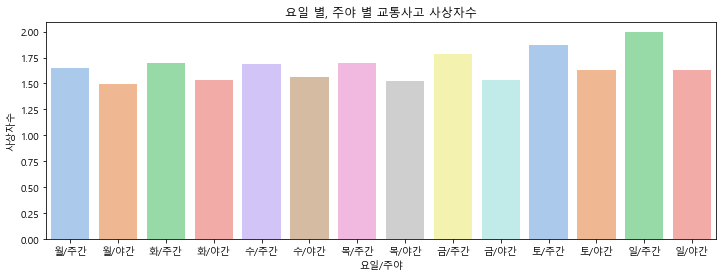

In [65]:
# 사상자수, 요일, 주야 그룹화
test_ = pd.concat([total['사상자수'],total['요일'],total['주야']], axis=1)
test_

# 요일별 주야별 사상자수 시각화

day = ['월','화','수','목','금','토','일']
juya = ['주간','야간']

test_list = []
for i in day:
    for j in juya:        
        test_list.append( [i+"/"+j, test_.loc[(test_['요일']==i) & (test_['주야']==j), '사상자수'].mean()])
        
x = []
y = []
for t in test_list:
    x.append(t[0]) # 요일/주야
    y.append(t[1]) # 요일/주야별 평균값

plt.figure(figsize = (12,4))
sns.barplot(x, y, palette="pastel", data=total)

#라밸과 타이틀 붙이기
plt.xlabel("요일/주야")
plt.ylabel("사상자수")
plt.title("요일 별, 주야 별 교통사고 사상자수")
plt.show()

### <br> 시각화2 ->  사상자별 비율

In [66]:
#함수생성
def percent(index_name, list_name) :
    sum= total[index_name].sum()
    list_name.append(total.loc[total[index_name] == 0, index_name].sum()/sum)
    list_name.append(total.loc[total[index_name] == 1, index_name].sum()/sum)
    list_name.append(total.loc[total[index_name] == 2, index_name].sum()/sum)
    list_name.append(total.loc[total[index_name] == 3, index_name].sum()/sum)
    list_name.append(total.loc[total[index_name] >= 4, index_name].sum()/sum)

#빈리스트 생성
critical = [] #사망자수
major = [] #사상자수
normal = [] #중상자수
minor = [] #경상자수
simple = [] #부상신고자수

#함수 수행
percent('사망자수', critical)
percent('사상자수', major)
percent('중상자수', normal)
percent('경상자수', minor)
percent('부상신고자수', simple)

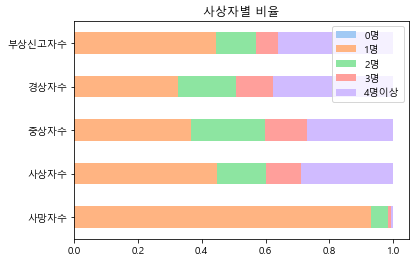

In [67]:
# 딕셔너리 생성
victim_dic = {
    '사망자수' : critical,
    '사상자수' : major,
    '중상자수' : normal,
    '경상자수' : minor,
    '부상신고자수' : simple
}

#딕셔너리를 데이터 프레임형태로 변환
victim_df = pd.DataFrame(victim_dic)
victim_df.index = ['0명','1명','2명','3명','4명이상']
victim_df = victim_df.T

# 시각화
palette = sns.color_palette("pastel")
victim_df.plot(kind = 'barh', stacked = True, color = palette) #(가로로생성, 한줄에 출력, 색상지정)
plt.title("사상자별 비율")
plt.show()

### <br> 시각화3 ->  발생지시도별 사고발생 수 시각화

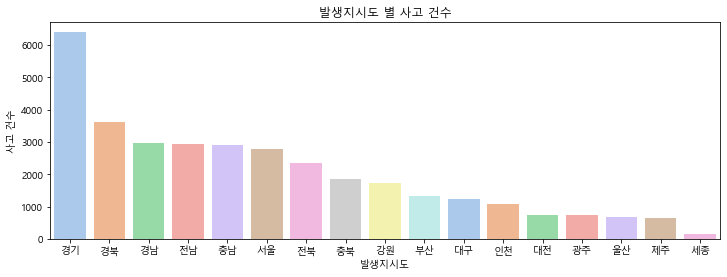

In [68]:
# 발생지시도별 사고발생 수 시각화
y = total['발생지시도'].value_counts()
plt.figure(figsize = (12,4))
sns.barplot(x=y.index, y=y,palette="pastel", data=total)

#라벨과 타이틀 붙이기
plt.xlabel("발생지시도")
plt.ylabel("사고 건수")
plt.title('발생지시도 별 사고 건수')
plt.show()

### <br> 시각화4 -> 시도별 전국 평균과의 위험도 차이

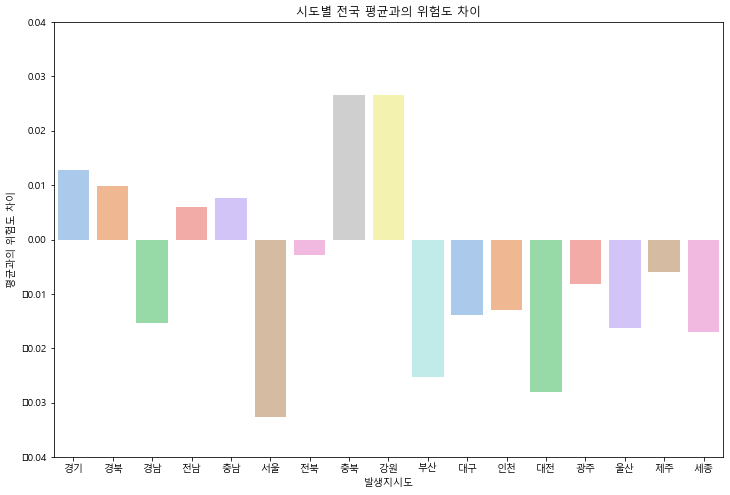

In [69]:
# x축 항목
sidos = total['발생지시도'].value_counts().index
sidos

# 위험도 : 사망자수/사상자수
all_sido_avg = (total['사망자수'] / total['사상자수']).mean()
danger_rate = []
for sido in sidos:
    danger_rate.append((total[total['발생지시도']==sido]['사망자수'] / total[total['발생지시도']==sido]['사상자수']).mean())

# y값 -> 위험도차이
y = []
for i in (danger_rate):
    y.append(all_sido_avg - i)

#시각화
plt.figure(figsize = (12,8))
sns.barplot(x=sidos, y=y,palette="pastel", data=total)
plt.ylim([-0.04,0.04]) # y축 범위 설정

#라벨과 타이틀 붙이기
plt.xlabel("발생지시도")
plt.ylabel("평균과의 위험도 차이")
plt.title('시도별 전국 평균과의 위험도 차이')
plt.show()

### <br> 시각화5 ->  1당사자 별 사고건수 시각화

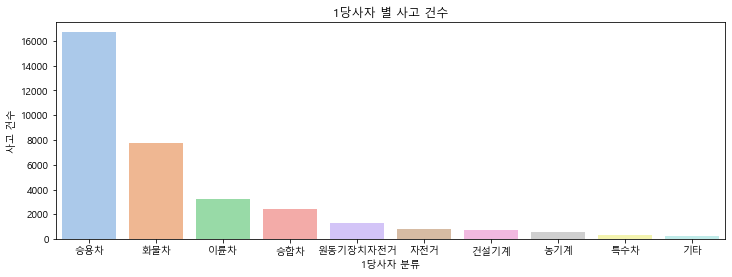

In [70]:
# 1당사자 별 사고건수 시각화
y = total['당사자종별_1당_대분류'].value_counts()

#시각화
plt.figure(figsize=(12,4))
sns.barplot(x=y.index, y = y, palette='pastel', data=total)

#라벨과 타이틀 붙이기
plt.xlabel("1당사자 분류")
plt.ylabel("사고 건수")
plt.title('1당사자 별 사고 건수')
plt.show()

### <br> 시각화6 ->  2당사자 별 사고건수 시각화

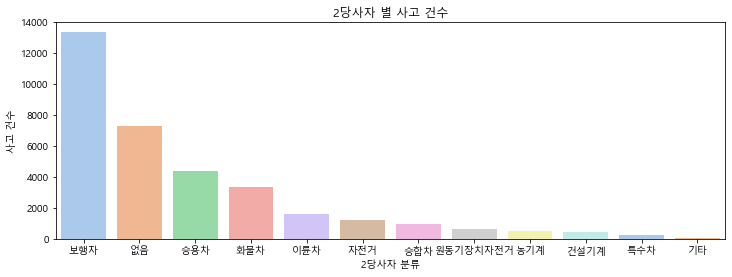

In [71]:
# 2당사자 별 사고건수 시각화
y = total['당사자종별_2당_대분류'].value_counts()

#시각화
plt.figure(figsize=(12,4))
sns.barplot(x=y.index, y = y, palette='pastel', data=total)

#라벨과 타이틀 붙이기
plt.xlabel("2당사자 분류")
plt.ylabel("사고 건수")
plt.title('2당사자 별 사고 건수')
plt.show()

### <br> 시각화7 -> 시도별 전국 평균과의 위험도 차이

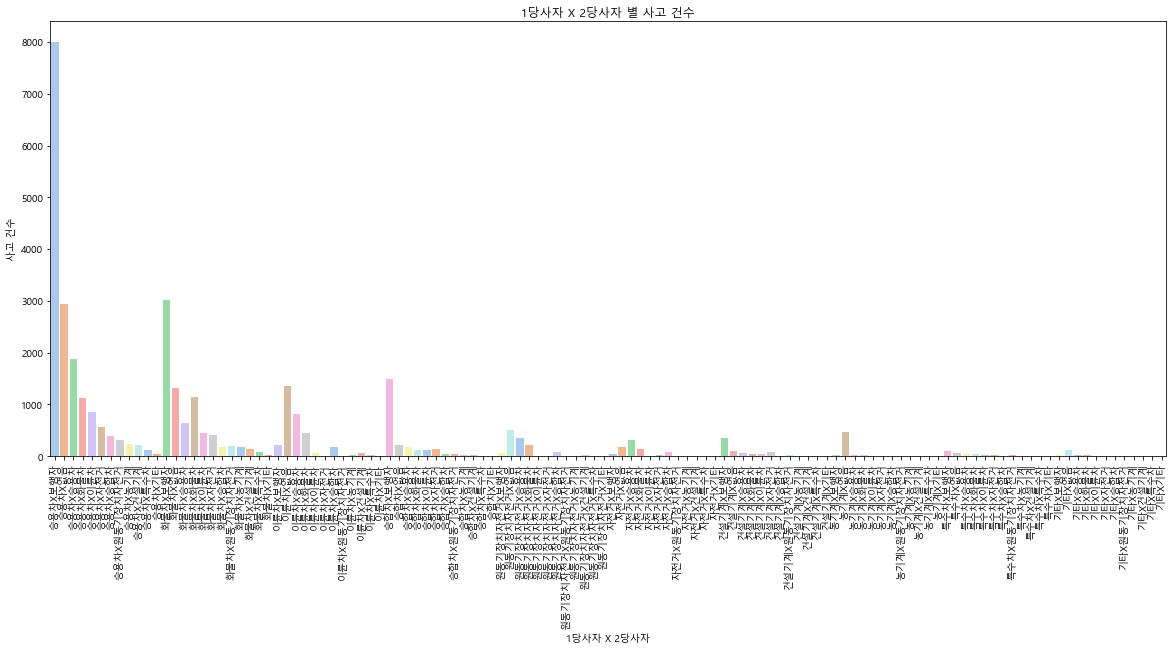

In [72]:
# 1당사자와 2당사자 조합별 사고건수 시각화
y1_id = total['당사자종별_1당_대분류'].value_counts().index
y2_id = total['당사자종별_2당_대분류'].value_counts().index

# y_id : x축(1당사자, 2당사자 조합)
# y : 조합별 사고 건수
y = []
y_id = []
for i in y1_id:
    for j in y2_id:
        y.append(total[(total['당사자종별_1당_대분류']==i) & (total['당사자종별_2당_대분류']==j)].shape[0])
        y_id.append(i+"X"+j)

#시각화
plt.figure(figsize = (20,8))
sns.barplot(x=y_id, y=y, palette="pastel", data=total)
plt.xticks(rotation = 90)

#라벨과 타이틀붙이기
plt.xlabel("1당사자 X 2당사자")
plt.ylabel("사고 건수")
plt.title('1당사자 X 2당사자 별 사고 건수')
plt.show()

### <br> 시각화8 -> 수집한 교통사고 지점 경,위도 시각화

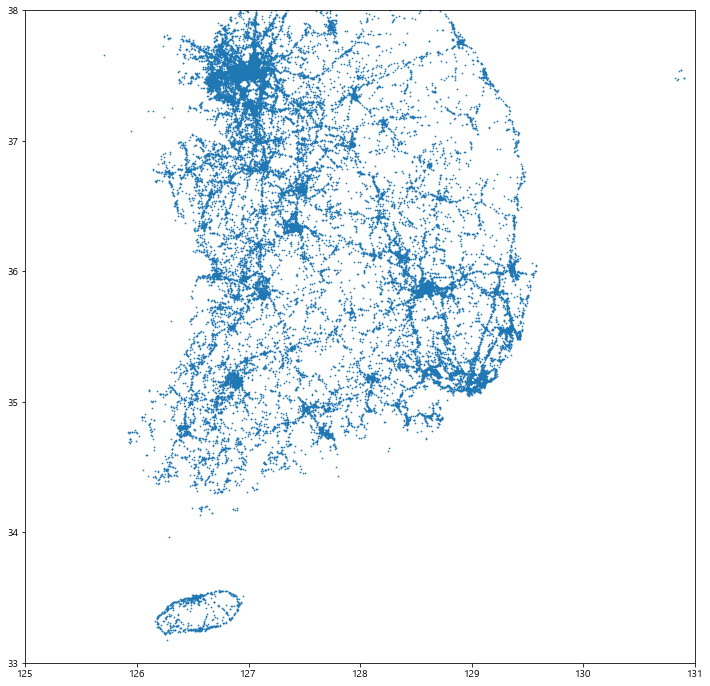

In [73]:
# 2012-2019년 전체 교통사고 지점의 경,위도 산점도
plt.figure(figsize=(12,12))

plt.scatter(total['경도'], total['위도'], s=0.5)
plt.xlim(125,131)
plt.ylim(33,38)
plt.show()

### <br> 시각화9 -> 터널안 사고 경도,위도 시각화

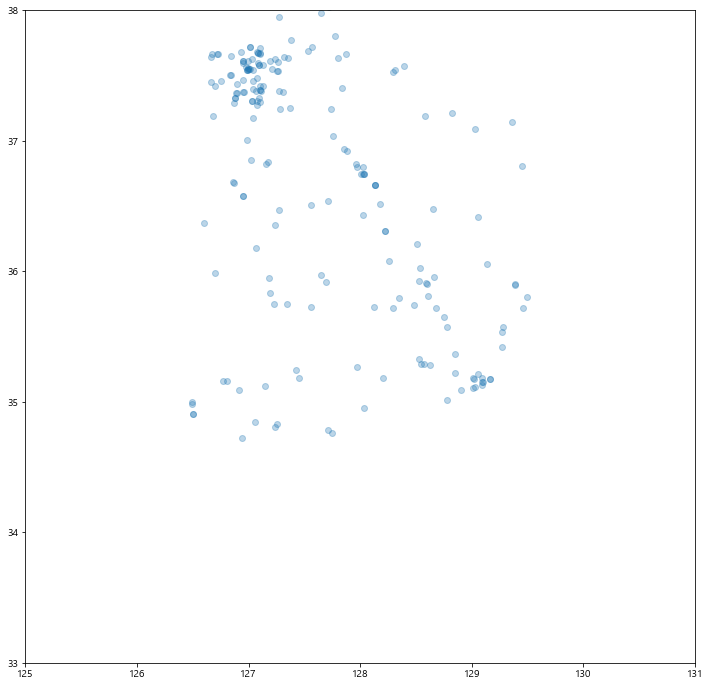

In [74]:
# 터널안 사고 경도,위도 시각화
x = total.loc[total['도로형태']=='터널안','경도']
y = total.loc[total['도로형태']=='터널안','위도']
plt.figure(figsize=(12,12))

plt.scatter(x,y, alpha = 0.3)
plt.xlim(125,131)
plt.ylim(33,38)
plt.show()

### <br> 시각화10 -> 교량위 사고 경도,위도 시각화

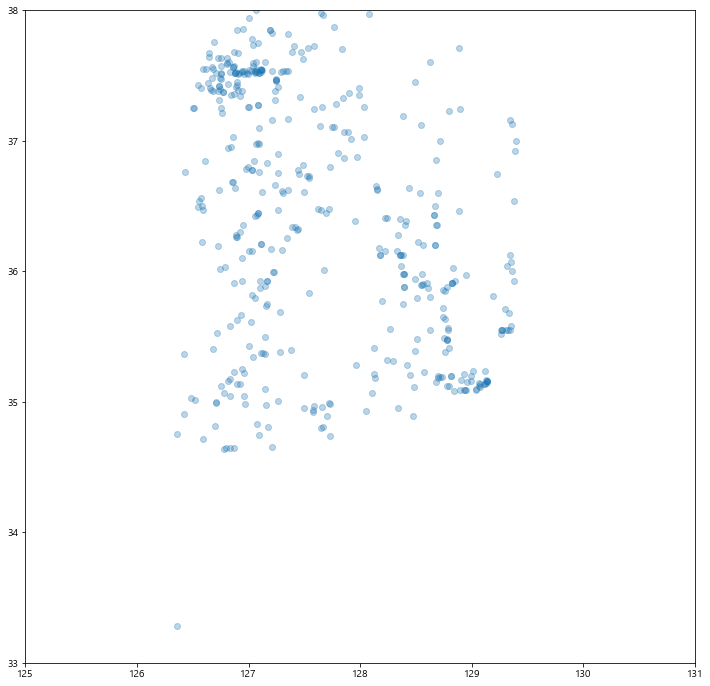

In [75]:
# 교량 위 사고 경도, 위도 시각화
x = total.loc[total['도로형태']=='교량위','경도']
y = total.loc[total['도로형태']=='교량위','위도']
plt.figure(figsize=(12,12))

plt.scatter(x,y, alpha = 0.3)
plt.xlim(125,131)
plt.ylim(33,38)
plt.show()

# <br><br> maps_modeling

In [77]:
# 데이터 확인
total.head()

,발생년월일,주야,요일,사망자수,사상자수,중상자수,경상자수,부상신고자수,발생지시도,발생지시군구,사고유형_대분류,사고유형_중분류,법규위반,도로형태_대분류,도로형태,당사자종별_1당_대분류,당사자종별_2당_대분류,경도,위도,사고피해정도,사고차량타입,도시여부,주말/공휴일,발생지,발생지번호
0,2019-01-01,야간,화,1,1,0,0,0,부산,해운대구,차대사람,기타,중앙선 침범,교차로,교차로내,승용차,보행자,129.1525,35.1579,4,승용차보행자,0,1,부산해운대구,1
1,2019-01-01,야간,화,1,1,0,0,0,경기,안산시,차대차,정면충돌,중앙선 침범,단일로,기타단일로,승용차,승용차,126.8571,37.2883,4,승용차승용차,0,1,경기안산시,2
2,2019-01-01,주간,화,1,1,0,0,0,경북,청도군,차대차,측면충돌,안전운전 의무 불이행,교차로,교차로부근,승용차,기타,128.6092,35.6501,4,승용차기타,0,1,경북청도군,3
3,2019-01-01,야간,화,1,1,0,0,0,대전,서구,차대사람,횡단중,안전운전 의무 불이행,교차로,교차로부근,승용차,보행자,127.3796,36.3559,4,승용차보행자,0,1,대전서구,4
4,2019-01-01,야간,화,1,1,0,0,0,경북,영천시,차대사람,기타,안전운전 의무 불이행,단일로,기타단일로,승용차,보행자,128.9150,35.8995,4,승용차보행자,0,1,경북영천시,5


In [78]:
# 경도, 위도 값 사용
X = total[['경도','위도']].values

### <br> DBSCAN

In [79]:
# eps: 이웃을 정의하기 위한 거리(epsilon)
# min_samples : 핵심데이터를 정의하기 위해 필요한 이웃영역안 데이터 갯수
db = DBSCAN(eps=0.01, min_samples=9).fit(X) ## 319
# db = DBSCAN(eps=0.02, min_samples=13).fit(X) ## 207


# labels_ : 군집 번호 (아웃라이어는 -1)
# core_sample_indices : 핵심 데이터의 인덱스
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_]=True
labels = db.labels_


# 클러스터 번호
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

print(f'Estimated number of clusters: {n_clusters_}')

Estimated number of clusters: 319


In [80]:
unique_labels = set(labels)
len(labels[labels == 1])

267

#### DBSCAN을 사용해서 군집화

색깔이 있는 원은 각 군집의 중심을 나타내고 상대적으로 작고 검은색 점은 군집에 포함되지 않는 노이즈를 나타낸다.
발생지 319개가 어떤 군집에 포함이 되고, 포함이 된다면 확률은 얼마인지

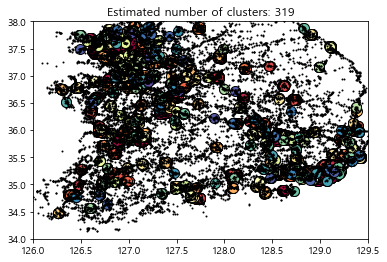

In [81]:
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]

for k, col in zip(unique_labels, colors):
    if k== -1:
        # Black used for noise
        col = [0,0,0,1]
    
    class_member_mask = (labels == k)
    
    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:,0], xy[:,1], 'o', markerfacecolor=tuple(col),
            markeredgecolor='k', markersize=10)
    
    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:,0], xy[:,1], 'o', markerfacecolor=tuple(col),
            markeredgecolor='k', markersize=1)
    
plt.xlim(126.0,129.5)
plt.ylim(34,38)
plt.title(f'Estimated number of clusters: {n_clusters_}')
plt.show()

#### components의 수를 몇개로 할것인지?

발생지시도와 발생지시군구를 합쳐서 만든 변수인 발생지 변수에선 234 개의 구역이 나왔다.<br>
행정구역상 기준으로한다면 위 기준으로 하는 것이 맞으나,<br>
사고다발지를 계산해서 데이터 자체에 의미있는 새로운 변수를 생성하는데는 적합하지 않을 수 있다.<br>
아래 그래프는 gmm과 같은 generative 모델의 경우 데이터에 주어지는 고유의 확률분포에 따라
정보량을 측정할수있는 측정기준을 제공한다, AIC와 BIC는 각각 다음과 같다.<br>
Akaike information criterion<br>
Bayesian information criterion

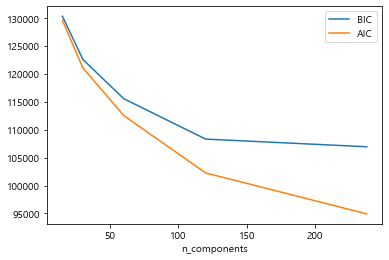

In [82]:
n_components = [15, 30, 60, 120, 238]
models = [mixture.GaussianMixture(n, covariance_type='full', random_state=0).fit(X)
          for n in n_components]

plt.plot(n_components, [m.bic(X) for m in models], label='BIC')
plt.plot(n_components, [m.aic(X) for m in models], label='AIC')
plt.legend(loc='best')
plt.xlabel('n_components');

### <br> GaussianMixture

#### GaussianMixture 모델을 사용해서 군집화를 해보면
이전 모델과는 달리 components의 갯수를 직접 설정해주어야 한다.<br>
가우시안 모델이다보니 따로 노이즈로 표시되지 않고 같은 클러스터라면 우선 동일한 색으로 표시가 된다.

In [83]:
gmm = mixture.GaussianMixture(n_components=120, covariance_type='full',
                             random_state=42).fit(X)
labels = gmm.predict(X)

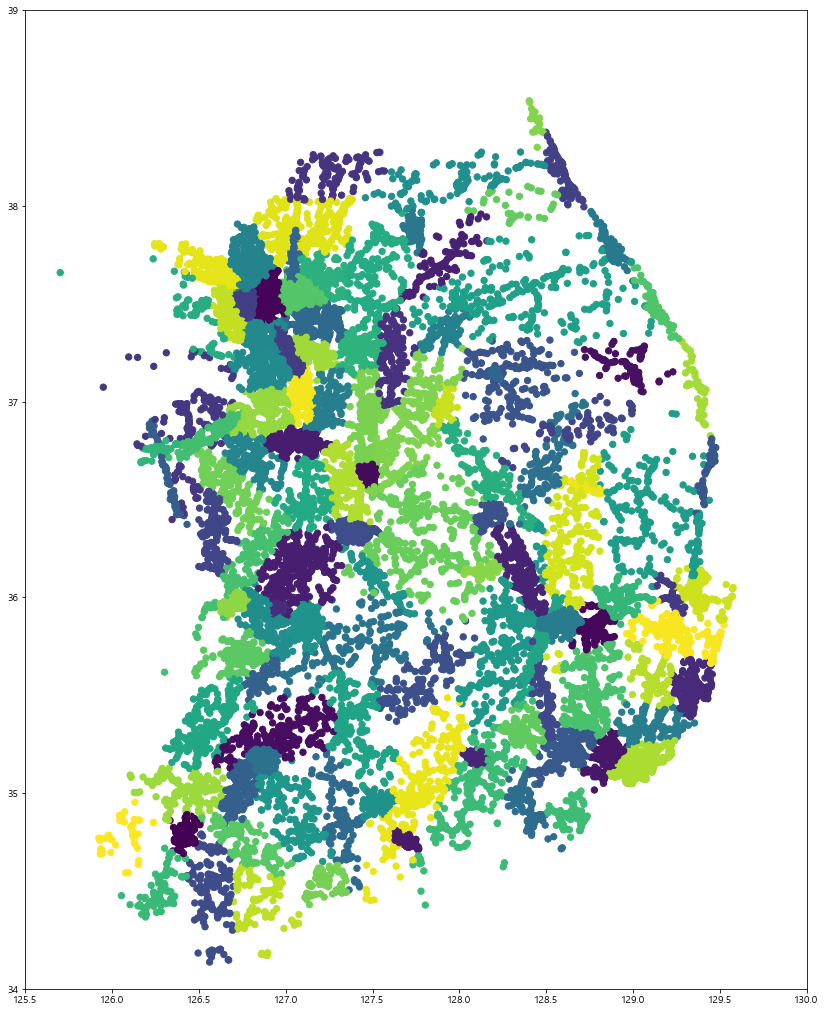

In [84]:
plt.figure(figsize=(14,18))
plt.xlim(125.5,130)
plt.ylim(34,39)
plt.scatter(X[:,0], X[:,1], c=labels, s=40, cmap='viridis')

In [85]:
probas = gmm.predict_proba(X)
probas.shape

df_probas = np.amax(probas, axis=1).mean()

In [86]:
df_probas.shape

()

In [87]:
dpgmm = mixture.BayesianGaussianMixture(n_components=130, covariance_type='full',
                             random_state=42).fit(X)
labels = dpgmm.predict(X)

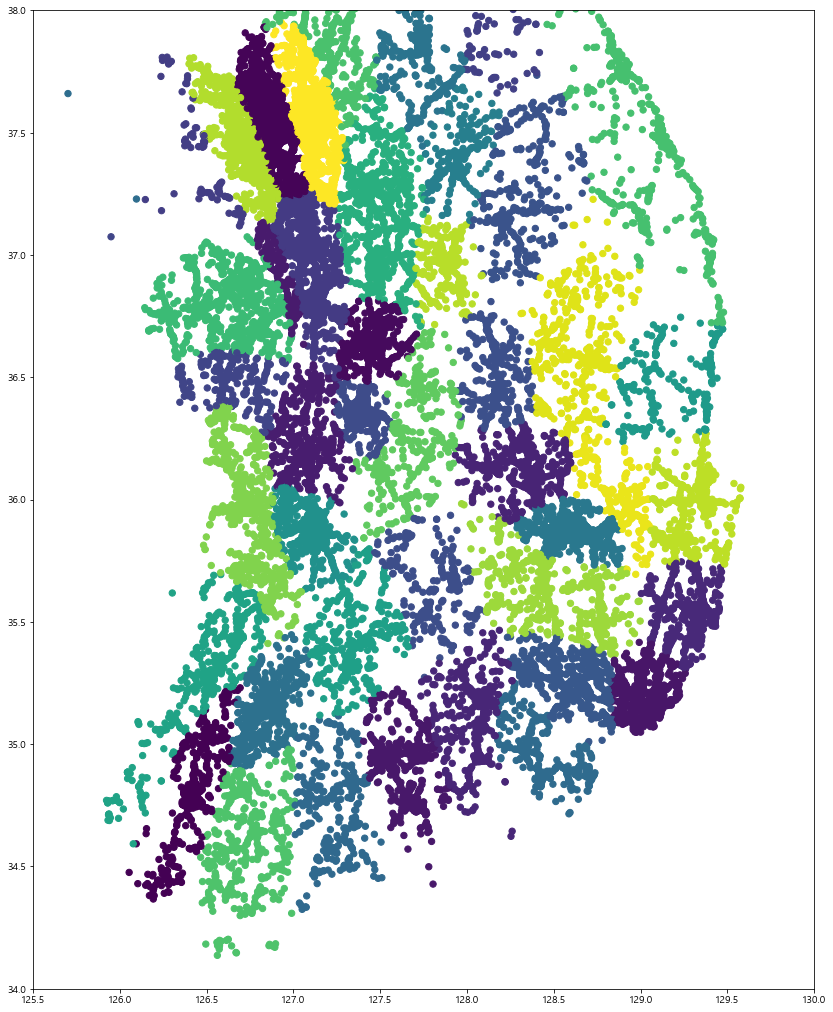

In [88]:
plt.figure(figsize=(14,18))
plt.xlim(125.5,130)
plt.ylim(34,38)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis');

In [89]:
dpprobas = dpgmm.predict_proba(X)
dpprobas.shape

dp_probas = np.amax(dpprobas, axis=1)
dp_probas.mean()

0.8115386842431268

In [90]:
dp_probas.shape

(34145,)

In [91]:
labels.shape

(34145,)

In [92]:
# #### 현재 테스트 데이터에는 위도,경도 좌표가 없고 발생지 정보만 있다
# train 데이터셋에선 동일한 발생지이더라도(발생지시도+발생지시군구) 다른 군집에 속할수도 있다.<br>
# 대표적인 군집과 각각의 확률을 어떻게 구할것인가?<br>
# 단순 평균으로 군집과 확률을 계산해도 결과에 영향을 미치지 않을까?

#  <br><br>사고다발지 활용

In [93]:
# 데이터 확인
jaywalk.head()

,다발지식별자,다발지그룹식별자,법정동코드,스팟코드,관할경찰서,다발지명,발생건수,사상자수,사망자수,중상자수,경상자수,부상신고자수,경도,위도,다발지역폴리곤,사고피해정도
0,169921,2013114,1114015400,111104001,서울 서울중부1,서울특별시 중구 오장동(오장동사거리 부근),4,0,0,3,1,0,127.003907,37.564700,"{""type"":""Polygon"",""coordinates"":[[[127.0063079...",11
1,220162,2014117,1168011800,111134002,서울 서울수서2,서울특별시 강남구 도곡동(부영빌딩 부근),5,5,0,5,0,0,127.032814,37.487416,"{""type"":""Polygon"",""coordinates"":[[[127.0352122...",15
2,220164,2014117,2726010600,272205001,대구 대구수성1,대구광역시 수성구 수성동4가(신천시장네거리 부근),5,6,1,3,2,0,128.617914,35.862361,"{""type"":""Polygon"",""coordinates"":[[[128.6202629...",17
3,220166,2014117,2914010400,292403001,광주 광주서부1,광주광역시 서구 양동(양유교종점 부근),5,5,2,2,1,0,126.900554,35.153686,"{""type"":""Polygon"",""coordinates"":[[[126.9028823...",16
4,220169,2014117,1138010600,111132005,서울 서울은평5,서울특별시 은평구 대조동(동명여고 부근),6,6,1,4,1,0,126.925673,37.615145,"{""type"":""Polygon"",""coordinates"":[[[126.9280754...",18


In [94]:
jaywalk["법정동코드/10000"] = np.ceil(jaywalk.법정동코드/10000)
jaywalk['발생지'] = jaywalk['다발지명'].apply(lambda e: e.split(" ")[:2])

oldwalk["법정동코드/10000"] = np.ceil(oldwalk.법정동코드/10000)
oldwalk['발생지'] = oldwalk['다발지명'].apply(lambda e: e.split(" ")[:2])

childwalk["법정동코드/10000"] = np.ceil(childwalk.법정동코드/10000)
childwalk['발생지'] = childwalk['다발지명'].apply(lambda e: e.split(" ")[:2])

schoolzone["법정동코드/10000"] = np.ceil(schoolzone.법정동코드/10000)
schoolzone['발생지'] = schoolzone['다발지명'].apply(lambda e: e.split(" ")[:2])

bikezone["법정동코드/10000"] = np.ceil(bikezone.법정동코드/10000)
bikezone['발생지'] = bikezone['다발지명'].apply(lambda e: e.split(" ")[:2])\

In [95]:
jaywalk["법정동코드/10000"] = np.ceil(jaywalk.법정동코드/10000)
jaywalk_sum = jaywalk.groupby(['법정동코드/10000', '다발지그룹식별자']).agg({'사고피해정도': 'sum', '발생건수':'sum'})
jaywalk_sum.head(5)

사고피해정도  발생건수
법정동코드/10000 다발지그룹식별자              
111102.0    2013114       62    25
            2014117      235    84
            2015052      170    64
            2016052       42    16
            2017081       28     9

In [96]:
oldwalk_sum = oldwalk.groupby(['법정동코드/10000', '다발지명']).agg({'사고피해정도': 'sum', '발생건수':'sum'})
oldwalk_sum.head(5)

사고피해정도  발생건수
법정동코드/10000 다발지명                                           
111102.0    서울특별시 종로구 견지동(안국동사거리~우정국로 부근)           8     3
            서울특별시 종로구 경운동(안국동사거리_율곡로_진출_1 부근)      14     3
            서울특별시 종로구 관수동(종로3가 부근)                 27    10
            서울특별시 종로구 관훈동(조계사앞 부근)                  6     3
            서울특별시 종로구 교북동(독립문_의주로_진출_1 부근)          9     3

In [97]:
childwalk["법정동코드/10000"] = np.ceil(childwalk.법정동코드/10000)
childwalk_sum = childwalk.groupby(['법정동코드/10000', '다발지그룹식별자']).agg({'사고피해정도': 'sum', '발생건수':'sum'})
childwalk_sum.head(5)

사고피해정도  발생건수
법정동코드/10000 다발지그룹식별자              
111102.0    2014110        8     3
111402.0    2014110       24     9
111702.0    2013097        5     3
            2016044        6     3
112002.0    2013097       10     4

In [98]:
schoolzone["법정동코드/10000"] = np.ceil(schoolzone.법정동코드/10000)
schoolzone_sum = schoolzone.groupby(['법정동코드/10000', '다발지그룹식별자']).agg({'사고피해정도': 'sum', '발생건수':'sum'})
schoolzone_sum.head(5)

,,사고피해정도,발생건수
법정동코드/10000,다발지그룹식별자,,
1124.0,2015042,5,2
1133.0,2015042,5,2
1136.0,2015042,18,1
1139.0,2015042,11,5
1148.0,2015042,4,2


In [99]:
bikezone["법정동코드/10000"] = np.ceil(bikezone.법정동코드/10000)
bikezone_sum = bikezone.groupby(['법정동코드/10000', '다발지그룹식별자']).agg({'사고피해정도': 'sum', '발생건수':'sum'})
bikezone_sum.head(5)

사고피해정도  발생건수
법정동코드/10000 다발지그룹식별자              
111102.0    2013099       26    13
            2015046       12     5
            2016047       18     9
            2017050        8     4
            2018032       40    14

### 자전거사고다발지 지역별 클러스터링

In [100]:
bikezone = bikezone[(bikezone.경도 > 125) & (bikezone.경도 < 130) & (bikezone.위도 > 34) & (bikezone.위도 < 38.5)]
X_bike = bikezone[["경도", "위도"]].values

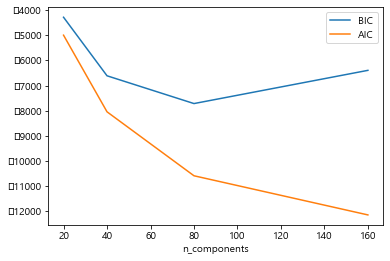

In [101]:
n_components = [20, 40, 80, 160]
models = [mixture.GaussianMixture(n, covariance_type='full', random_state=0).fit(X_bike)
          for n in n_components]

plt.plot(n_components, [m.bic(X_bike) for m in models], label='BIC')
plt.plot(n_components, [m.aic(X_bike) for m in models], label='AIC')
plt.legend(loc='best')
plt.xlabel('n_components');

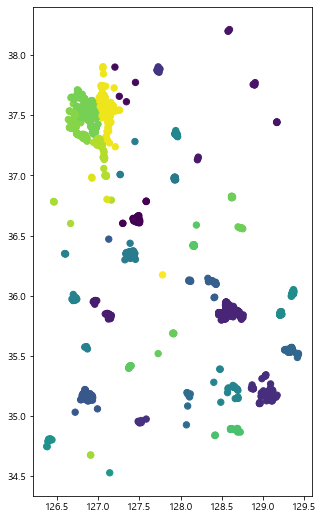

In [102]:
dpgmm = mixture.BayesianGaussianMixture(n_components=80, covariance_type='full').fit(X)
labels = dpgmm.predict(X_bike)

plt.figure(figsize=(5,9))
plt.scatter(X_bike[:, 0], X_bike[:, 1], c=labels, s=40, cmap='viridis');

# <br><br>무단횡단 사고별 피해정도 비교

In [132]:
jaywalk.shape, oldwalk.shape, childwalk.shape, schoolzone.shape, bikezone.shape

((1861, 18), (3390, 18), (773, 18), (231, 18), (2984, 18))

In [133]:
jaywalk['사고피해정도'].sum(), oldwalk['사고피해정도'].sum(), childwalk['사고피해정도'].sum(), schoolzone['사고피해정도'].sum(), bikezone['사고피해정도'].sum()

(31455, 40163, 6612, 1249, 37973)

In [134]:
jaywalk['사망자수'].sum(), oldwalk['사망자수'].sum(), childwalk['사망자수'].sum(), schoolzone['사망자수'].sum(), bikezone['사망자수'].sum()

(806, 1096, 22, 31, 221)

In [135]:
#차도통행중
print('주간 차도통행중 사고피해정도 : ', total_temp[(total_temp['사고유형_중분류'] == "차도통행중") & (total_temp['주야'] == "주간")].사고피해정도.sum())
print('야간 차도통행중 사고피해정도 : ', total_temp[(total_temp['사고유형_중분류'] == "차도통행중") & (total_temp['주야'] == "야간")].사고피해정도.sum())

#횡단중
print('주간 횡단중 사고피해정도 : ', total_temp[(total_temp['사고유형_중분류'] == "횡단중") & (total_temp['주야'] == "주간")].사고피해정도.sum())
print('야간 횡단중 사고피해정도 : ', total_temp[(total_temp['사고유형_중분류'] == "횡단중") & (total_temp['주야'] == "야간")].사고피해정도.sum())

#기타
print('주간 기타 사고피해정도 : ', total_temp[(total_temp['사고유형_중분류'] == "기타") & (total_temp['주야'] == "주간")].사고피해정도.sum())
print('야간 기타 사고피해정도 : ', total_temp[(total_temp['사고유형_중분류'] == "기타") & (total_temp['주야'] == "야간")].사고피해정도.sum())

주간 차도통행중 사고피해정도 :  1866
야간 차도통행중 사고피해정도 :  3926
주간 횡단중 사고피해정도 :  11362
야간 횡단중 사고피해정도 :  19180
주간 기타 사고피해정도 :  6837
야간 기타 사고피해정도 :  9809


# <br><br> 보행자의위치 및 무단횡단여부 컬럼 생성

In [136]:
total['사고유형_대분류'].value_counts()

차대차      13484
차대사람     13367
차량단독      7285
철길건널목        5
건널목          4
Name: 사고유형_대분류, dtype: int64

In [137]:
# 차대사람 사고와 차량사고로 나누기
car_person = total[total['사고유형_대분류'] == '차대사람']

car_car = total[(total['사고유형_대분류'] == '철길건널목') | (total['사고유형_대분류'] == '건널목') 
                  | (total['사고유형_대분류'] == '차량단독') | (total['사고유형_대분류'] == '차대차')]

In [138]:
car_person['사고유형_중분류'].value_counts()

횡단중           7221
기타            3780
차도통행중         1377
길가장자리구역통행중     618
보도통행중          371
Name: 사고유형_중분류, dtype: int64

In [139]:
# 보행자 도보중 사고
def isJaywalk(x):
    if x in ('횡단중', '기타', '차도통행중'):
        return 1
    else:
        return 0

In [140]:
car_person['보행자의위치'] = car_person['사고유형_중분류'].apply(isJaywalk)

In [141]:
# 횡단중일 때
jaywalk_0 = car_person[car_person['보행자의위치']==1]

In [142]:
# 횡단중이면서 보행자 과실일때 => 무단횡단
jaywalk_1 = car_person[(car_person['보행자의위치']==1) & (car_person['법규위반'] != '보행자 보호의무 위반')]

In [143]:
car_person = car_person.reset_index()

In [144]:
car_person['무단횡단여부'] = 0

In [145]:
for i in range(len(car_person)):
    if (car_person['보행자의위치'][i] == 1) and (car_person['법규위반'][i] != '보행자 보호의무 위반'):
        car_person['무단횡단여부'][i] = 1

In [147]:
# 이상치 해결
car_person.loc[car_person['당사자종별_2당_대분류'] == '승용차', '당사자종별_2당_대분류'] = "보행자"
car_person.loc[car_person['당사자종별_2당_대분류'] == '화물차', '당사자종별_2당_대분류'] = "보행자"
car_person.loc[car_person['사고차량타입'] == '승용차승용차', '사고차량타입'] = "승용차보행자"
car_person.loc[car_person['사고차량타입'] == '승용차화물차', '사고차량타입'] = "승용차보행자"
car_person.loc[car_person['도로형태'] == '횡단보도상', '도로형태'] = "교차로횡단보도내"
car_person.loc[car_person['도로형태'] == '횡단보도부근', '도로형태'] = "교차로횡단보도내"
car_person.loc[car_person['도로형태'] == '지하차도(도로)내', '도로형태'] = "기타단일로"
car_person.loc[car_person['도로형태'] == '교량위', '도로형태'] = "기타단일로"
car_person.loc[car_person['도로형태'] == '고가도로위', '도로형태'] = "기타단일로"
car_person.loc[car_person['도로형태'] == '터널안', '도로형태'] = "기타단일로"
car_person.loc[car_person['법규위반'] == '보행자과실', '법규위반'] = "안전운전 의무 불이행"
car_person.loc[car_person['법규위반'] == '서행 및 일시정지위반', '법규위반'] = "안전운전 의무 불이행"
car_person.loc[car_person['법규위반'] == '차로위반(진로변경 위반)', '법규위반'] = "안전운전 의무 불이행"
car_person.loc[car_person['법규위반'] == '정비불량 제차의 운전금지위반', '법규위반'] = "안전운전 의무 불이행"
car_person.loc[car_person['법규위반'] == '직진 및 우회전차의 통행방해', '법규위반'] = "안전운전 의무 불이행"
car_person.loc[car_person['법규위반'] == '교차로 통행방법 위반', '법규위반'] = "안전운전 의무 불이행"
car_person.loc[car_person['법규위반'] == '부당한 회전', '법규위반'] = "안전운전 의무 불이행"
car_person.loc[car_person['법규위반'] == '안전거리 미확보', '법규위반'] = "안전운전 의무 불이행"
car_person.loc[car_person['법규위반'] == '기타', '법규위반'] = "안전운전 의무 불이행"

In [ ]:
car_person

In [148]:
car_person.to_csv('./data/car_person.csv', encoding='euc-kr', index=False)
car_car.to_csv('./data/car_car.csv', encoding='euc-kr', index=False)

# <br><br> 데이터 상관관계 분석(히트맵)

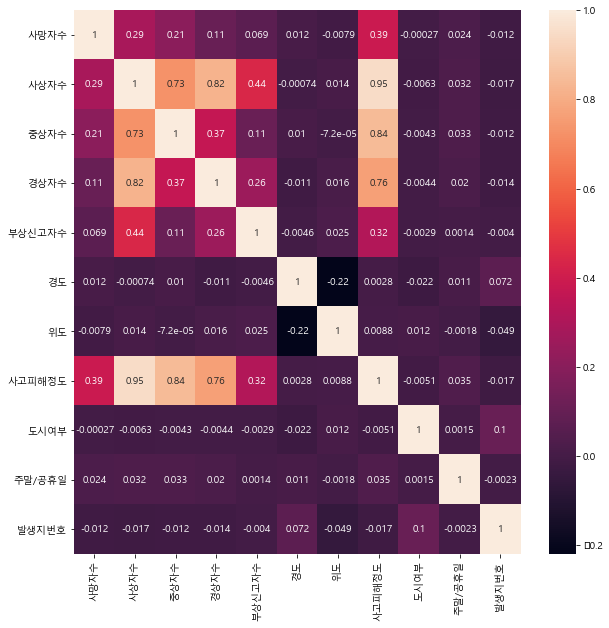

In [149]:
# 훈련데이터 히트맵 출력
plt.figure(figsize=(10,10))
#annot = True : 히트맵에 값을 출력
sns.heatmap(total.corr(), annot = True)

# <br><br> 모델 예측

In [8]:
del car_person['index']
del car_person['발생년월일']
del car_person['사망자수']
del car_person['사상자수']
del car_person['중상자수']
del car_person['경상자수']
del car_person['부상신고자수']
del car_person['사고유형_대분류']
del car_person['사고유형_중분류']
del car_person['발생지']

In [9]:
car_person.head(20)

,주야,요일,발생지시도,발생지시군구,법규위반,도로형태_대분류,도로형태,당사자종별_1당_대분류,당사자종별_2당_대분류,경도,위도,사고피해정도,사고차량타입,도시여부,주말/공휴일,발생지번호,보행자의위치,무단횡단여부,강수량,적설,전운량,시정
0,야간,수,경기,평택,안전운전 의무 불이행,단일로,기타단일로,승용차,보행자,127.0670,36.9957,4,승용차보행자,0,0,14,1,1,0.0,0.00,0.08,1665.88
1,주간,금,경기,여주,안전운전 의무 불이행,교차로,교차로부근,화물차,보행자,127.6372,37.2966,4,화물차보행자,0,0,22,1,1,0.0,0.00,3.25,986.33
2,야간,토,경기,안성,안전운전 의무 불이행,단일로,기타단일로,승용차,보행자,127.2208,37.0106,4,승용차보행자,0,1,23,1,1,0.0,0.00,1.50,995.75
3,주간,화,경기,김포,안전운전 의무 불이행,단일로,기타단일로,화물차,보행자,126.6033,37.6872,4,화물차보행자,0,0,47,1,1,0.0,0.00,1.25,1807.96
4,야간,화,경기,양평,안전운전 의무 불이행,교차로,교차로내,승용차,보행자,127.6274,37.5060,4,승용차보행자,0,0,48,1,1,0.0,0.00,0.96,1217.46
5,야간,수,경기,화성,안전운전 의무 불이행,단일로,기타단일로,화물차,보행자,126.9105,37.1322,7,화물차보행자,0,0,50,1,1,0.0,0.00,5.17,1826.08
6,야간,목,경기,용인,안전운전 의무 불이행,단일로,기타단일로,화물차,보행자,127.2400,37.2471,12,화물차보행자,0,0,51,1,1,0.0,0.00,6.08,907.46
7,야간,목,경기,고양,보행자 보호의무 위반,교차로,교차로내,화물차,보행자,126.8780,37.5957,4,화물차보행자,0,0,40,1,0,0.0,0.00,7.08,1892.21
8,주간,금,경기,고양,안전운전 의무 불이행,기타,기타,승용차,보행자,126.8400,37.6487,4,승용차보행자,0,0,40,1,1,0.0,0.00,6.00,1983.79
9,야간,토,경기,화성,안전운전 의무 불이행,단일로,기타단일로,승용차,보행자,126.9395,37.1946,4,승용차보행자,0,1,50,1,1,0.0,0.00,5.88,430.92


### <br> 원핫인코딩

In [10]:
data_dummies = pd.get_dummies(car_person)

In [11]:
one_hot_encoding = data_dummies
one_hot_encoding.head()

,경도,위도,사고피해정도,도시여부,주말/공휴일,발생지번호,보행자의위치,무단횡단여부,강수량,적설,전운량,시정,주야_야간,주야_주간,요일_금,...,당사자종별_1당_대분류_이륜차,당사자종별_1당_대분류_자전거,당사자종별_1당_대분류_특수차,당사자종별_1당_대분류_화물차,당사자종별_2당_대분류_보행자,사고차량타입_건설기계보행자,사고차량타입_기타보행자,사고차량타입_농기계보행자,사고차량타입_승용차보행자,사고차량타입_승합차보행자,사고차량타입_원동기장치자전거보행자,사고차량타입_이륜차보행자,사고차량타입_자전거보행자,사고차량타입_특수차보행자,사고차량타입_화물차보행자
0,127.0670,36.9957,4,0,0,14,1,1,0.0,0.0,0.08,1665.88,1,0,0,...,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
1,127.6372,37.2966,4,0,0,22,1,1,0.0,0.0,3.25,986.33,0,1,1,...,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1
2,127.2208,37.0106,4,0,1,23,1,1,0.0,0.0,1.50,995.75,1,0,0,...,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
3,126.6033,37.6872,4,0,0,47,1,1,0.0,0.0,1.25,1807.96,0,1,0,...,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1
4,127.6274,37.5060,4,0,0,48,1,1,0.0,0.0,0.96,1217.46,1,0,0,...,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0


In [12]:
one_hot_encoding['발생지번호']

0         14
1         22
2         23
3         47
4         48
        ... 
13511    167
13512    139
13513     97
13514    201
13515     98
Name: 발생지번호, Length: 13516, dtype: int64

In [13]:
X = one_hot_encoding
y = one_hot_encoding['사고피해정도']

del X['사고피해정도']

In [14]:
X.head()

,경도,위도,도시여부,주말/공휴일,발생지번호,보행자의위치,무단횡단여부,강수량,적설,전운량,시정,주야_야간,주야_주간,요일_금,요일_목,...,당사자종별_1당_대분류_이륜차,당사자종별_1당_대분류_자전거,당사자종별_1당_대분류_특수차,당사자종별_1당_대분류_화물차,당사자종별_2당_대분류_보행자,사고차량타입_건설기계보행자,사고차량타입_기타보행자,사고차량타입_농기계보행자,사고차량타입_승용차보행자,사고차량타입_승합차보행자,사고차량타입_원동기장치자전거보행자,사고차량타입_이륜차보행자,사고차량타입_자전거보행자,사고차량타입_특수차보행자,사고차량타입_화물차보행자
0,127.0670,36.9957,0,0,14,1,1,0.0,0.0,0.08,1665.88,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
1,127.6372,37.2966,0,0,22,1,1,0.0,0.0,3.25,986.33,0,1,1,0,...,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1
2,127.2208,37.0106,0,1,23,1,1,0.0,0.0,1.50,995.75,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
3,126.6033,37.6872,0,0,47,1,1,0.0,0.0,1.25,1807.96,0,1,0,0,...,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1
4,127.6274,37.5060,0,0,48,1,1,0.0,0.0,0.96,1217.46,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0


### <br> train test 생성

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 10, test_size=0.3)

In [16]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((9461, 278), (4055, 278), (9461,), (4055,))

## <br><br> KNN 알고리즘
- 새로운 데이터 포인트와 가장 가까운 훈련 데이터 셋의 데이터 포인트를 찾아 예측
- k 값에 따라 가까운 이웃의 수가 결정(이웃의 수는 대부분 홀수로 설정하는게 좋다.

In [17]:
from sklearn.neighbors import KNeighborsClassifier
model= KNeighborsClassifier(n_neighbors=7) # 이거는 21이면 random forest와 같이 비슷해 7로 해서 점점 더 좋아지는 모습을 보여주는 게 좋을 거 같다

model.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')

In [18]:
print(model.score(X_train,y_train))
print(model.score(X_test,y_test))

0.923052531444879
0.9228113440197288


## <br><br> Decision Tree (분류나무 사용)
- 의사결정 나무는 분류함수를 의사결정 규칙으로 이뤄진 나무 모양으로 그리는 방법이다.


####  의사결정 나무 과대적합 제어
- 노드 생성을 미리 중단하는 사전 가지치기와 트리를 만든 후에 크기가 작은 노드를 삭제하는 사후 가지치기를 사용한다.
- 트리의 최대 깊이나 리프 노드의 최대 개수를 제어
- 노드가 분할 하기 위한 데이터 포인트의 최소 개수를 지정

<br> 주요 의사결정 나무 가지치기 / DecisionTreeClassfier(max_depth, max_leaf_nodes, min_samples_leaf) 
<br> max_depth : 트리의 최대 깊이 ,  max_leaf_nodes : 리프 노드의 최대개수 , min_samples_leaf : 리프 노드를 구성하는 샘플의 개수 
<br> 대부분 max_depth만 설정한다

In [19]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(max_depth=10)
model.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [20]:
print(model.score(X_train,y_train))
print(model.score(X_test,y_test))

0.9338336328083712
0.916399506781751


# <br><br> Decision Tree GridSearchCV
- GridSearchCV를 통해 최적의 파라미터를 찾아서 의사결정 나무를 수행

In [21]:
from sklearn.model_selection import GridSearchCV

In [22]:
param = {"max_depth":range(1,5), "max_leaf_nodes":range(1, 50, 10), "min_samples_leaf":range(1, 150, 10)}

grid_search = GridSearchCV(DecisionTreeClassifier(), param, cv=5)

In [23]:
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': range(1, 5),
                         'm

In [24]:
print(grid_search.score(X_train,y_train))
print(grid_search.score(X_test,y_test))

0.923052531444879
0.9228113440197288


#  <br> <br> Logistic Regression
- 기존 선형회귀 와는 다른게 x(독립변수)가 연속형이고 y(종속변수)가 범주형 변수일 때 사용하는 회귀분석 방법으로, 대표적인 분류분석 방법 
  중 하나이다.
- 이번에는 기존의 이진분류의 로지스틱 회귀분석에서 다중분류 로지스틱 회귀분석으로 확장하여 분석을 수행하였습니다.

In [25]:
from sklearn.linear_model import LogisticRegression

In [27]:
lr_model = LogisticRegression(C=0.1, max_iter = 20000).fit(X_train,y_train)

KeyboardInterrupt: 

In [ ]:
print(lr_model.score(X_train,y_train))
print(lr_model.score(X_test,y_test))

# <br><br> RandomForest 
- 서로 다른 방향으로 과대적합된 트리를 많이 만들고, 평균을 내어 일반화 시키는 모델
- 배깅 중 하나로, 여러 개의 의사결정 트리를 선형결합 하여 강력한 머신러닝 기법 중 하나이다.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
params = { 'n_estimators' : [10, 500,10],
           'max_depth' : [6, 8, 10, 12],
           'min_samples_leaf' : [8, 12, 18],
           'min_samples_split' : [8, 16, 20]
            }

# RandomForestClassifier 객체 생성 후 GridSearchCV 수행
rf_clf = RandomForestClassifier(random_state = 0, n_jobs = -1)
grid_cv = GridSearchCV(rf_clf, param_grid = params, cv = 3, n_jobs = -1)
grid_cv.fit(X_train, y_train)

In [ ]:
print(grid_cv.score(X_train,y_train))
print(grid_cv.score(X_test,y_test))

# <br><br>AdaBoost
- 의사 결정 나무들의 약한 학습기(weak learner)의 오류 데이터에 가중치를 부여하면서 부스팅을 수행하는 대표적인 알고리즘
  속도나 성능적인 측면에서 decision tree를 약한 학습기로 사용함

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

params = { 'n_estimators' : [10, 500,10],
           'learning_rate': [0.001,0.01,0.1],
            }

# AdaBoostClassifier 객체 생성 후 GridSearchCV 수행
model_ada = AdaBoostClassifier(random_state = 0)
grid_cv = GridddSearchCV(model_ada, param_grid = params, verbose=1, n_jobs = -1)
grid_cv.fit(X_train, y_train)
model = AdaBoostClassifier(n_estimators=1000, random_state=0).fit(X_train, y_train)

In [ ]:
print(model.score(X_train,y_train))
print(model.score(X_test,y_test))

# <br><br> GradientBoost
- AdaBoost와 거의 유사하지만 가중치에 부여할 때, Gradient Descent를 사용한다
- Gradient Descent는 흔히 경사하강법이라고도 불리며, 손실 함수를 정량화 해주는 역할
  을 수행한다.

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

params = { 'n_estimators' : [10, 500,10],
           'max_depth' : [6, 8, 10, 12],
           'min_samples_leaf' : [3,5,7,10],
           'min_samples_split' : [2,3,5,10],
           'learning_rate':[0.05,0.1,0.2]
            }

# GradientBoostingClassifier 객체 생성 후 GridSearchCV 수행
model_gra = GradientBoostingClassifier(random_state = 0)
grid_cv = GridSearchCV(model_gra, param_grid = params, verbose=1, n_jobs = -1)
grid_cv.fit(X_train, y_train)

print(model_GBoost.score(X_train,y_train))
print(model_GBoost.score(X_train,y_train))

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense #Dense 는 레이어를 생성하는 함수

In [ ]:
model = Sequential()
model.add(400,input_dim=291,activation="relu") # x 컬럼이 294개 이므로 입력신호는 291개로 설정, 입력층은 400개로 우선설정
model.add(1,activation="softmax") # 1개의 출력층만 가지고, 다중분류이므로 softmax함수 사용
model.compile(loss="categorical_crossentropy",optimize="adam",metrics=["accuracy"]) # 다중분류이므로 loss를 categorical_crossentropy사용

In [ ]:
mport matplotlib.pyplot as plt
plt.style.use('dark_background') 
history = model.fit(X_train,y_train,epochs=100,validation_split=0.3,verbose=0,batch_size=500)
# validation data 생성 / verbose를 0으로 하면 학습내용 출력 억제
plt.plot( history.history['loss'],label = 'train') # history 안에 history 속성사용
plt.plot( history.history['val_loss'],label = 'validation')
# 위에서 생성한 검증 값 출력
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# 그래프를 그리는 목적 : 최적의 epochs를 찾기 위해서 시각화
# 그래프를 그리는 이유 : 최적의 epochs를 찾기 위해서 loss 값이 0에 가깝게 포화되면서 최적의 값을 찾겠다.

In [ ]:
model.fit(X_train,y_train,epochs=100,verbose=0)

print('Train')
model.evaluate(X_train,y_train)
print('Test')
model.evaluate(X_test,y_test)

# <br><br>파일저장

In [ ]:
total.to_csv('./data/total_0822.csv', encoding='euc-kr', index=False)